In [1]:
import sys
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


## Importing the necessary libraries ##

In [194]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

# hide warnings
import warnings
warnings.filterwarnings('ignore')


# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Loading the data ##

In [199]:
# Opening JSON file 
f = open('C:/Users/JU486WK/OneDrive - EY/Desktop/Text Classification/complaints-2021-05-14_08_16.json') 
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

In [196]:
df.shape

(78313, 22)

In [200]:
df = df.sample(1000)

In [201]:
df.shape

(1000, 22)

## Data Preparation ##

In [202]:
df.head(5)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
55447,complaint-public-v2,complaint,3844,0.0,None,91651,3844,APR or interest rate,2011-12-06T12:00:00-05:00,CA,No,Credit card,Closed with relief,JPMORGAN CHASE & CO.,Referral,2011-12-08T12:00:00-05:00,None,None,Yes,,None,N/A
25189,complaint-public-v2,complaint,3993036,0.0,Older American,330XX,3993036,Closing on a mortgage,2020-12-05T12:00:00-05:00,FL,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2020-12-05T12:00:00-05:00,None,Conventional home mortgage,Yes,"We closed the refinancing from XXXX XXXX and XXXX XXXX XXXX ' Representative came to our house and we signed all required loan disclosures on XXXX XX/XX/2020. The Closing disclosure shows the disbursement of our balance loan payment to Chase on XX/XX/2020 and the balance of the 1st mortgage loan as {$340000.00}. However, the XXXX XXXX XXXX representative failed to wire the funds until XX/XX/2020. Further the Chase payment shows that the actual payment made to Chase bank was $ {$340000.00}. This means that XXXX XXXX XXXX still holding the our balance of {$65000.00}. \nI am unable to get hold of the Escrow Officer Ms. XXXX XXXX on telephone and she failed to return my calls. In addition XXXX XXXX XXXX failed to respond to my email letters too as of this day. \nFailure to return the the overpaid Escrow money to the customer even after around four weeks and failure to provide full disclosure of the Escrow money and return this to the customer promptly is not only unethical practice but it may be even illegal practice. \nNobody seems to respond to my telephone calls and not even my email letters. \nI am NOT sure if they just want to pocket this escrow money. \nI hope you may be able to take the appropriate action about such unethical & illegal practices of XXXX XXXX XXXXs which is also Title company. \nI and my wife are retiree and hoping to seek you help on this matter. \nThank you for you help and have a great day. \nXXXX XXXX, My Cell Tel XXXX XXXX XXXX, My email Address : XXXX XXXX",None,Consent provided
21554,complaint-public-v2,complaint,3424516,0.0,None,232XX,3424516,Closing an account,2019-10-31T12:00:00-05:00,VA,N/A,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-10-31T12:00:00-05:00,None,Checking account,Yes,they closed my account for no apparently reason I had direct deposit come into my account because somebody stole my card and multiple times and he gave me provisional credit each time Chase is the worst bank my card number XXXX was supposed to receive a direct deposit on XX/XX/XXXX it's now XX/XX/XXXX XXXX,Company closed your account,Consent provided
34165,complaint-public-v2,complaint,4329969,0.0,None,80214,4329969,Problem with a purchase shown on your statement,2021-04-27T12:00:00-05:00,CO,N/A,Credit card or prepaid card,In progress,JPMORGAN CHASE & CO.,Referral,2021-04-27T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Credit card company isn't resolving a dispute about a purchase on your statement,N/A
43761,complaint-public-v2,complaint,1643000,0.0,None,None,1643000,Balance transfer fee,2015-11-06T12:00:00-05:00,NJ,No,Credit card,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2015-11-06T12:00:00-05:00,None,None,Yes,"Chase is misleadingly using the wording "" Balance Transfer '' to mean everything, not just transferring a balance from one card to another. Nowhere in their terms or fees is this noted. This is completely misleading and a scam to their customers. \n\nThis is a portion of a letter sent to chase and describes the issue at hand : We received courtesy access checks in the ma

In [203]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [204]:
## Assign new column names ##
df = df[['_source.complaint_what_happened','_source.product','_source.sub_product',]]
df.head()

,_source.complaint_what_happened,_source.product,_source.sub_product
55447,,Credit card,None
25189,"We closed the refinancing from XXXX XXXX and XXXX XXXX XXXX ' Representative came to our house and we signed all required loan disclosures on XXXX XX/XX/2020. The Closing disclosure shows the disbursement of our balance loan payment to Chase on XX/XX/2020 and the balance of the 1st mortgage loan as {$340000.00}. However, the XXXX XXXX XXXX representative failed to wire the funds until XX/XX/2020. Further the Chase payment shows that the actual payment made to Chase bank was $ {$340000.00}. This means that XXXX XXXX XXXX still holding the our balance of {$65000.00}. \nI am unable to get hold of the Escrow Officer Ms. XXXX XXXX on telephone and she failed to return my calls. In addition XXXX XXXX XXXX failed to respond to my email letters too as of this day. \nFailure to return the the overpaid Escrow money to the customer even after around four weeks and failure to provide full disclosure of the Escrow money and return this to the customer promptly is not only unethical practice but it may be even illegal practice. \nNobody seems to respond to my telephone calls and not even my email letters. \nI am NOT sure if they just want to pocket this escrow money. \nI hope you may be able to take the appropriate action about such unethical & illegal practices of XXXX XXXX XXXXs which is also Title company. \nI and my wife are retiree and hoping to seek you help on this matter. \nThank you for you help and have a great day. \nXXXX XXXX, My Cell Tel XXXX XXXX XXXX, My email Address : XXXX XXXX",Mortgage,Conventional home mortgage
21554,they closed my account for no apparently reason I had direct deposit come into my account because somebody stole my card and multiple times and he gave me provisional credit each time Chase is the worst bank my card number XXXX was supposed to receive a direct deposit on XX/XX/XXXX it's now XX/XX/XXXX XXXX,Checking or savings account,Checking account
34165,,Credit card or prepaid card,General-purpose credit card or charge card
43761,"Chase is misleadingly using the wording "" Balance Transfer '' to mean everything, not just transferring a balance from one card to another. Nowhere in their terms or fees is this noted. This is completely misleading and a scam to their customers. \n\nThis is a portion of a letter sent to chase and describes the issue at hand : We received courtesy access checks in the mail recently, and as XXXX, we diligently read the terms and conditions very carefully before using any financial product. Everything was clearly spelled out on the concise paperwork provided. I have attached what was in the envelope for your review. We were quite surprised then, after using one of the checks that we received a 3 % "" transaction/service '' fee of {$240.00} on the {$8000.00} check. Immediately upon seeing this on my statement I went through my files to re-read the terms and conditions of the checks, of which I still have. \n\nAbsolutely nowhere on the paperwork provided by Chase was there a mention of a 3 % service fee applying on anything other than balance transfers from other credit cards to Chase. I did n't hesitate in calling the number on the back of my card and after wading through the prompts to finally access a living, breathing representative. She said there was very clearly printed on the checks all the terms and conditions. I kindly let her know I had the checks right in front of me and there was no such print anywhere. She said it was in the paperwork, of which I read her the entire sheet included with the checks proving otherwise and asked to elevate the case. \nI was transferred to a supervisor and placed on hold for over XXXX minutes while "" they brought up my account ''. XXXX ( of which she said she does n't give her last name or even it 's initial ), in XXXX XXXX told me that the terms and conditions clearly stated that I would pay a 3 % or {$5.00} service fee on balance transfers

In [205]:
# lets rename the column names to be more read friendly
# we have retained product and sub_product only for verification purpose ,
# these columns will not be used in the Topic modelling
df = df.rename(columns={'_source.complaint_what_happened': 'complaint_text', '_source.product': 'category','_source.sub_product': 'sub_category'})
df.head()

,complaint_text,category,sub_category
55447,,Credit card,None
25189,"We closed the refinancing from XXXX XXXX and XXXX XXXX XXXX ' Representative came to our house and we signed all required loan disclosures on XXXX XX/XX/2020. The Closing disclosure shows the disbursement of our balance loan payment to Chase on XX/XX/2020 and the balance of the 1st mortgage loan as {$340000.00}. However, the XXXX XXXX XXXX representative failed to wire the funds until XX/XX/2020. Further the Chase payment shows that the actual payment made to Chase bank was $ {$340000.00}. This means that XXXX XXXX XXXX still holding the our balance of {$65000.00}. \nI am unable to get hold of the Escrow Officer Ms. XXXX XXXX on telephone and she failed to return my calls. In addition XXXX XXXX XXXX failed to respond to my email letters too as of this day. \nFailure to return the the overpaid Escrow money to the customer even after around four weeks and failure to provide full disclosure of the Escrow money and return this to the customer promptly is not only unethical practice but it may be even illegal practice. \nNobody seems to respond to my telephone calls and not even my email letters. \nI am NOT sure if they just want to pocket this escrow money. \nI hope you may be able to take the appropriate action about such unethical & illegal practices of XXXX XXXX XXXXs which is also Title company. \nI and my wife are retiree and hoping to seek you help on this matter. \nThank you for you help and have a great day. \nXXXX XXXX, My Cell Tel XXXX XXXX XXXX, My email Address : XXXX XXXX",Mortgage,Conventional home mortgage
21554,they closed my account for no apparently reason I had direct deposit come into my account because somebody stole my card and multiple times and he gave me provisional credit each time Chase is the worst bank my card number XXXX was supposed to receive a direct deposit on XX/XX/XXXX it's now XX/XX/XXXX XXXX,Checking or savings account,Checking account
34165,,Credit card or prepaid card,General-purpose credit card or charge card
43761,"Chase is misleadingly using the wording "" Balance Transfer '' to mean everything, not just transferring a balance from one card to another. Nowhere in their terms or fees is this noted. This is completely misleading and a scam to their customers. \n\nThis is a portion of a letter sent to chase and describes the issue at hand : We received courtesy access checks in the mail recently, and as XXXX, we diligently read the terms and conditions very carefully before using any financial product. Everything was clearly spelled out on the concise paperwork provided. I have attached what was in the envelope for your review. We were quite surprised then, after using one of the checks that we received a 3 % "" transaction/service '' fee of {$240.00} on the {$8000.00} check. Immediately upon seeing this on my statement I went through my files to re-read the terms and conditions of the checks, of which I still have. \n\nAbsolutely nowhere on the paperwork provided by Chase was there a mention of a 3 % service fee applying on anything other than balance transfers from other credit cards to Chase. I did n't hesitate in calling the number on the back of my card and after wading through the prompts to finally access a living, breathing representative. She said there was very clearly printed on the checks all the terms and conditions. I kindly let her know I had the checks right in front of me and there was no such print anywhere. She said it was in the paperwork, of which I read her the entire sheet included with the checks proving otherwise and asked to elevate the case. \nI was transferred to a supervisor and placed on hold for over XXXX minutes while "" they brought up my account ''. XXXX ( of which she said she does n't give her last name or even it 's initial ), in XXXX XXXX told me that the terms and conditions clearly stated that I would pay a 3 % or {$5.00} service fee on balance transfers, to which I responded this che

In [206]:
# lets merge the category and sub-category this will help us in deciding the topics after NMF modelling
df['category'] = df['category'] + '+' + df['sub_category']
df = df.drop(['sub_category'],axis= 1)
df.head()

,complaint_text,category
55447,,NaN
25189,"We closed the refinancing from XXXX XXXX and XXXX XXXX XXXX ' Representative came to our house and we signed all required loan disclosures on XXXX XX/XX/2020. The Closing disclosure shows the disbursement of our balance loan payment to Chase on XX/XX/2020 and the balance of the 1st mortgage loan as {$340000.00}. However, the XXXX XXXX XXXX representative failed to wire the funds until XX/XX/2020. Further the Chase payment shows that the actual payment made to Chase bank was $ {$340000.00}. This means that XXXX XXXX XXXX still holding the our balance of {$65000.00}. \nI am unable to get hold of the Escrow Officer Ms. XXXX XXXX on telephone and she failed to return my calls. In addition XXXX XXXX XXXX failed to respond to my email letters too as of this day. \nFailure to return the the overpaid Escrow money to the customer even after around four weeks and failure to provide full disclosure of the Escrow money and return this to the customer promptly is not only unethical practice but it may be even illegal practice. \nNobody seems to respond to my telephone calls and not even my email letters. \nI am NOT sure if they just want to pocket this escrow money. \nI hope you may be able to take the appropriate action about such unethical & illegal practices of XXXX XXXX XXXXs which is also Title company. \nI and my wife are retiree and hoping to seek you help on this matter. \nThank you for you help and have a great day. \nXXXX XXXX, My Cell Tel XXXX XXXX XXXX, My email Address : XXXX XXXX",Mortgage+Conventional home mortgage
21554,they closed my account for no apparently reason I had direct deposit come into my account because somebody stole my card and multiple times and he gave me provisional credit each time Chase is the worst bank my card number XXXX was supposed to receive a direct deposit on XX/XX/XXXX it's now XX/XX/XXXX XXXX,Checking or savings account+Checking account
34165,,Credit card or prepaid card+General-purpose credit card or charge card
43761,"Chase is misleadingly using the wording "" Balance Transfer '' to mean everything, not just transferring a balance from one card to another. Nowhere in their terms or fees is this noted. This is completely misleading and a scam to their customers. \n\nThis is a portion of a letter sent to chase and describes the issue at hand : We received courtesy access checks in the mail recently, and as XXXX, we diligently read the terms and conditions very carefully before using any financial product. Everything was clearly spelled out on the concise paperwork provided. I have attached what was in the envelope for your review. We were quite surprised then, after using one of the checks that we received a 3 % "" transaction/service '' fee of {$240.00} on the {$8000.00} check. Immediately upon seeing this on my statement I went through my files to re-read the terms and conditions of the checks, of which I still have. \n\nAbsolutely nowhere on the paperwork provided by Chase was there a mention of a 3 % service fee applying on anything other than balance transfers from other credit cards to Chase. I did n't hesitate in calling the number on the back of my card and after wading through the prompts to finally access a living, breathing representative. She said there was very clearly printed on the checks all the terms and conditions. I kindly let her know I had the checks right in front of me and there was no such print anywhere. She said it was in the paperwork, of which I read her the entire sheet included with the checks proving otherwise and asked to elevate the case. \nI was transferred to a supervisor and placed on hold for over XXXX minutes while "" they brought up my account ''. XXXX ( of which she said she does n't give her last name or even it 's initial ), in XXXX XXXX told me that the terms and conditions clearly stated that I would pay a 3 % or {$5.00} service fee on balance transfers, to which I responded this check did not do. She said th

In [207]:
# lets check the nan complaints
df.complaint_text.isnull().sum()

0

In [208]:
# lets check the empty string complaints
len(df[df['complaint_text']==''])

739

In [209]:
#Assign nan in place of blanks in the complaints column
# lets replace empty complain with nan value
df[df['complaint_text']==''] = np.nan
df.complaint_text.isnull().sum()

739

In [210]:
#Remove all rows where complaints column is nan
# Lets drop all the rows where complaint_text is null
df = df[~df['complaint_text'].isnull()]
df.complaint_text.isnull().sum()

0

In [211]:
## Prepare the text for topic modelling ##
'''
1. Make the text lowercase
2. Remove text in square brackets
3. Remove punctuation
4.Remove wordscontaining numbers
'''

'\n1. Make the text lowercase\n2. Remove text in square brackets\n3. Remove punctuation\n4.Remove wordscontaining numbers\n'

In [212]:
# Write your function here to clean the text and remove all the unnecessary elements.
# Preparing text for Topic modelling
def clean_text(text):
    text = text.lower()  # Make the text lowercase
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [213]:
df.complaint_text = df.complaint_text.apply(lambda x: clean_text(x))
df.complaint_text.head()

25189    we closed the refinancing from xxxx xxxx and xxxx xxxx xxxx  representative came to our house and we signed all required loan disclosures on xxxx the closing disclosure shows the disbursement of our balance loan payment to chase on and the balance of the mortgage loan as however the xxxx xxxx xxxx representative failed to wire the funds until further the chase payment shows that the actual payment made to chase bank was  this means that xxxx xxxx xxxx still holding the our balance of i am unable to get hold of the escrow officer ms xxxx xxxx on telephone and she failed to return my calls in addition xxxx xxxx xxxx failed to respond to my email letters too as of this day \nfailure to return the the overpaid escrow money to the customer even after around four weeks and failure to provide full disclosure of the escrow money and return this to the customer promptly is not only unethical practice but it may be even illegal practice \nnobody seems to respond to my telephone calls an

In [214]:
#Write your function to Lemmatize the texts
# lemmatization
#Function to Lemmatize the texts
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [215]:
# Lemmatize the complaints
df['lemma'] =  df.complaint_text.apply(lambda x: lemmatizer(x))
df.head()

,complaint_text,category,lemma
25189,we closed the refinancing from xxxx xxxx and xxxx xxxx xxxx representative came to our house and we signed all required loan disclosures on xxxx the closing disclosure shows the disbursement of our balance loan payment to chase on and the balance of the mortgage loan as however the xxxx xxxx xxxx representative failed to wire the funds until further the chase payment shows that the actual payment made to chase bank was this means that xxxx xxxx xxxx still holding the our balance of i am unable to get hold of the escrow officer ms xxxx xxxx on telephone and she failed to return my calls in addition xxxx xxxx xxxx failed to respond to my email letters too as of this day \nfailure to return the the overpaid escrow money to the customer even after around four weeks and failure to provide full disclosure of the escrow money and return this to the customer promptly is not only unethical practice but it may be even illegal practice \nnobody seems to respond to my telephone calls and not even my email letters \ni am not sure if they just want to pocket this escrow money \ni hope you may be able to take the appropriate action about such unethical illegal practices of xxxx xxxx xxxxs which is also title company \ni and my wife are retiree and hoping to seek you help on this matter \nthank you for you help and have a great day \nxxxx xxxx my cell tel xxxx xxxx xxxx my email address xxxx xxxx,Mortgage+Conventional home mortgage,close refinancing xxxx xxxx xxxx xxxx xxxx representative come house sign require loan disclosure xxxx closing disclosure show disbursement balance loan payment chase balance mortgage loan xxxx xxxx xxxx representative fail wire fund chase payment show actual payment chase bank mean xxxx xxxx xxxx hold balance unable hold escrow officer ms xxxx xxxx telephone fail return call addition xxxx xxxx xxxx fail respond email letter day \n failure return overpaid escrow money customer week failure provide disclosure escrow money return customer promptly unethical practice illegal practice \n respond telephone call email letter \n sure want pocket escrow money \n hope able appropriate action unethical illegal practice xxxx xxxx xxxxs title company \n wife retiree hope seek help matter \n thank help great day \n xxxx xxxx cell tel xxxx xxxx xxxx email address xxxx xxxx
21554,they closed my account for no apparently reason i had direct deposit come into my account because somebody stole my card and multiple times and he gave me provisional credit each time chase is the worst bank my card number xxxx was supposed to receive a direct deposit on xxxxxxxx its now xxxxxxxx xxxx,Checking or savings account+Checking account,close account apparently reason direct deposit come account somebody steal card multiple time give provisional credit time chase bad bank card number xxxx suppose receive direct deposit xxxxxxxx xxxxxxxx xxxx
43761,chase is misleadingly using the wording balance transfer to mean everything not just transferring a balance from one card to another nowhere in their terms or fees is this noted this is completely misleading and a scam to their customers \n\nthis is a portion of a letter sent to chase and describes the issue at hand we received courtesy access checks in the mail recently and as xxxx we diligently read the terms and conditions very carefully before using any financial product everything was clearly spelled out on the concise paperwork provided i have attached what was in the envelope for your review we were quite surprised then after using one of the checks that we received a transactionservice fee of on the check immediately upon seeing this on my statement i went through my files to reread the terms and conditions of the checks of which i still have \n\nabsolutely nowhere on the paperwork provided by chase was there a mention of a service fee applying on anything other than balance transfers from other credit cards to chase i did nt hesitate in calling the number o

In [216]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = df[['complaint_text','lemma','category']]
df_clean.head()

,complaint_text,lemma,category
25189,we closed the refinancing from xxxx xxxx and xxxx xxxx xxxx representative came to our house and we signed all required loan disclosures on xxxx the closing disclosure shows the disbursement of our balance loan payment to chase on and the balance of the mortgage loan as however the xxxx xxxx xxxx representative failed to wire the funds until further the chase payment shows that the actual payment made to chase bank was this means that xxxx xxxx xxxx still holding the our balance of i am unable to get hold of the escrow officer ms xxxx xxxx on telephone and she failed to return my calls in addition xxxx xxxx xxxx failed to respond to my email letters too as of this day \nfailure to return the the overpaid escrow money to the customer even after around four weeks and failure to provide full disclosure of the escrow money and return this to the customer promptly is not only unethical practice but it may be even illegal practice \nnobody seems to respond to my telephone calls and not even my email letters \ni am not sure if they just want to pocket this escrow money \ni hope you may be able to take the appropriate action about such unethical illegal practices of xxxx xxxx xxxxs which is also title company \ni and my wife are retiree and hoping to seek you help on this matter \nthank you for you help and have a great day \nxxxx xxxx my cell tel xxxx xxxx xxxx my email address xxxx xxxx,close refinancing xxxx xxxx xxxx xxxx xxxx representative come house sign require loan disclosure xxxx closing disclosure show disbursement balance loan payment chase balance mortgage loan xxxx xxxx xxxx representative fail wire fund chase payment show actual payment chase bank mean xxxx xxxx xxxx hold balance unable hold escrow officer ms xxxx xxxx telephone fail return call addition xxxx xxxx xxxx fail respond email letter day \n failure return overpaid escrow money customer week failure provide disclosure escrow money return customer promptly unethical practice illegal practice \n respond telephone call email letter \n sure want pocket escrow money \n hope able appropriate action unethical illegal practice xxxx xxxx xxxxs title company \n wife retiree hope seek help matter \n thank help great day \n xxxx xxxx cell tel xxxx xxxx xxxx email address xxxx xxxx,Mortgage+Conventional home mortgage
21554,they closed my account for no apparently reason i had direct deposit come into my account because somebody stole my card and multiple times and he gave me provisional credit each time chase is the worst bank my card number xxxx was supposed to receive a direct deposit on xxxxxxxx its now xxxxxxxx xxxx,close account apparently reason direct deposit come account somebody steal card multiple time give provisional credit time chase bad bank card number xxxx suppose receive direct deposit xxxxxxxx xxxxxxxx xxxx,Checking or savings account+Checking account
43761,chase is misleadingly using the wording balance transfer to mean everything not just transferring a balance from one card to another nowhere in their terms or fees is this noted this is completely misleading and a scam to their customers \n\nthis is a portion of a letter sent to chase and describes the issue at hand we received courtesy access checks in the mail recently and as xxxx we diligently read the terms and conditions very carefully before using any financial product everything was clearly spelled out on the concise paperwork provided i have attached what was in the envelope for your review we were quite surprised then after using one of the checks that we received a transactionservice fee of on the check immediately upon seeing this on my statement i went through my files to reread the terms and conditions of the checks of which i still have \n\nabsolutely nowhere on the paperwork provided by chase was there a mention of a service fee applying on anything other than balance transfers from other credit cards to chase i did nt hesitate in calling the number o

In [217]:
#Write your function to extract the POS tags NN
def extract_pos_tags(text):
    doc = nlp(text)
    sent = [token.text for token in doc if token.tag_ == 'NN']
    return ' '.join(sent)

In [218]:
df_clean['complaint_POS_removed'] =  df_clean.lemma.apply(lambda x: extract_pos_tags(x))
df_clean.head()

,complaint_text,lemma,category,complaint_POS_removed
25189,we closed the refinancing from xxxx xxxx and xxxx xxxx xxxx representative came to our house and we signed all required loan disclosures on xxxx the closing disclosure shows the disbursement of our balance loan payment to chase on and the balance of the mortgage loan as however the xxxx xxxx xxxx representative failed to wire the funds until further the chase payment shows that the actual payment made to chase bank was this means that xxxx xxxx xxxx still holding the our balance of i am unable to get hold of the escrow officer ms xxxx xxxx on telephone and she failed to return my calls in addition xxxx xxxx xxxx failed to respond to my email letters too as of this day \nfailure to return the the overpaid escrow money to the customer even after around four weeks and failure to provide full disclosure of the escrow money and return this to the customer promptly is not only unethical practice but it may be even illegal practice \nnobody seems to respond to my telephone calls and not even my email letters \ni am not sure if they just want to pocket this escrow money \ni hope you may be able to take the appropriate action about such unethical illegal practices of xxxx xxxx xxxxs which is also title company \ni and my wife are retiree and hoping to seek you help on this matter \nthank you for you help and have a great day \nxxxx xxxx my cell tel xxxx xxxx xxxx my email address xxxx xxxx,close refinancing xxxx xxxx xxxx xxxx xxxx representative come house sign require loan disclosure xxxx closing disclosure show disbursement balance loan payment chase balance mortgage loan xxxx xxxx xxxx representative fail wire fund chase payment show actual payment chase bank mean xxxx xxxx xxxx hold balance unable hold escrow officer ms xxxx xxxx telephone fail return call addition xxxx xxxx xxxx fail respond email letter day \n failure return overpaid escrow money customer week failure provide disclosure escrow money return customer promptly unethical practice illegal practice \n respond telephone call email letter \n sure want pocket escrow money \n hope able appropriate action unethical illegal practice xxxx xxxx xxxxs title company \n wife retiree hope seek help matter \n thank help great day \n xxxx xxxx cell tel xxxx xxxx xxxx email address xxxx xxxx,Mortgage+Conventional home mortgage,house sign loan disclosure xxxx disclosure balance loan payment wire fund chase payment payment balance escrow officer telephone return call addition xxxx failure return escrow money customer week failure disclosure escrow money return customer practice practice telephone call email letter pocket escrow money hope action practice wife help matter day cell address
21554,they closed my account for no apparently reason i had direct deposit come into my account because somebody stole my card and multiple times and he gave me provisional credit each time chase is the worst bank my card number xxxx was supposed to receive a direct deposit on xxxxxxxx its now xxxxxxxx xxxx,close account apparently reason direct deposit come account somebody steal card multiple time give provisional credit time chase bad bank card number xxxx suppose receive direct deposit xxxxxxxx xxxxxxxx xxxx,Checking or savings account+Checking account,account reason deposit somebody card time credit time chase bank card number xxxx deposit
43761,chase is misleadingly using the wording balance transfer to mean everything not just transferring a balance from one card to another nowhere in their terms or fees is this noted this is completely misleading and a scam to their customers \n\nthis is a portion of a letter sent to chase and describes the issue at hand we received courtesy access checks in the mail recently and as xxxx we diligently read the terms and conditions very carefully before using any financial product everything was clearly spelled out on the concise paperwork provided i have attached what was in the envelope for your revie

## Exploratory data analysis ##

In [219]:
'''
Write the code in this task to perform the following:

Visualise the data according to the 'Complaint' character length
Using a word cloud find the top 40 words by frequency among all the articles after processing the text
Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘
'''

"\nWrite the code in this task to perform the following:\n\nVisualise the data according to the 'Complaint' character length\nUsing a word cloud find the top 40 words by frequency among all the articles after processing the text\nFind the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘\n"

(array([53., 55., 38., 36., 19., 15., 12.,  8.,  5.,  5.,  6.,  1.,  2.,
         2.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   0.  ,   94.78,  189.56,  284.34,  379.12,  473.9 ,  568.68,
         663.46,  758.24,  853.02,  947.8 , 1042.58, 1137.36, 1232.14,
        1326.92, 1421.7 , 1516.48, 1611.26, 1706.04, 1800.82, 1895.6 ,
        1990.38, 2085.16, 2179.94, 2274.72, 2369.5 , 2464.28, 2559.06,
        2653.84, 2748.62, 2843.4 , 2938.18, 3032.96, 3127.74, 3222.52,
        3317.3 , 3412.08, 3506.86, 3601.64, 3696.42, 3791.2 , 3885.98,
        3980.76, 4075.54, 4170.32, 4265.1 , 4359.88, 4454.66, 4549.44,
        4644.22, 4739.  ]),
 <BarContainer object of 50 artists>)

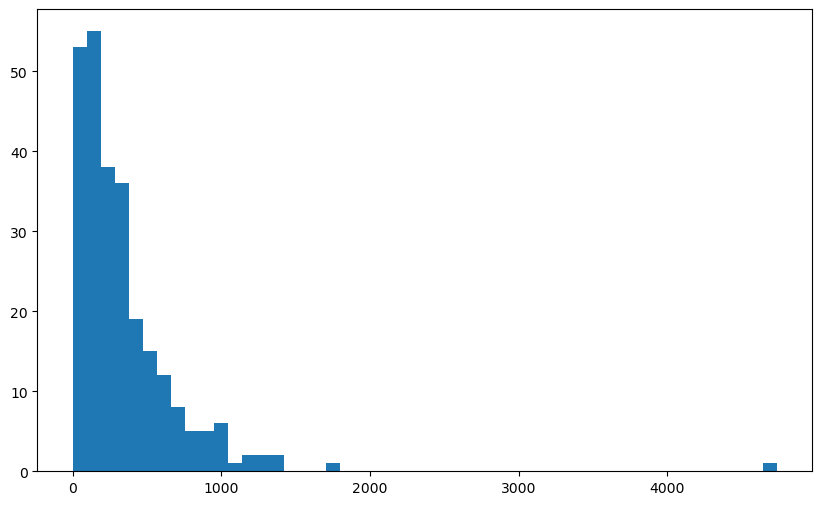

In [220]:
#  to visualise the data according to the 'Complaint' character length

plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean.complaint_POS_removed]
plt.hist(doc_lens, bins = 50)

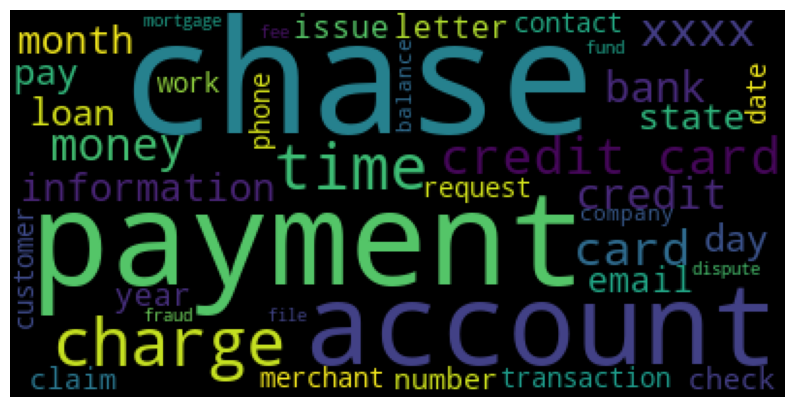

In [221]:
## Find the top 40 words by frequency among all the articles after processing the text.
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stopwords,max_words=40).generate(str(df_clean.complaint_POS_removed))

print(wordcloud)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [222]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')
df_clean = df_clean.drop(['complaint_POS_removed'],axis = 1)

In [223]:
## Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text
# Write your code here to find the top 30 unigram,bigram,trigram frequency 
# among the complaints in the cleaned datafram(df_clean).

def get_top_n_bigram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]

In [224]:
top_30_unigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=3, top=30)

In [225]:
#Print the top 10 words in the unigram frequency
print('Top 10 unigrams:\n')
top_30_unigrams[:10]

Top 10 unigrams:



[('chase', 441),
 ('credit', 364),
 ('card', 345),
 ('account', 317),
 ('payment', 307),
 ('charge', 244),
 ('time', 186),
 ('xxxx', 154),
 ('loan', 130),
 ('money', 129)]

In [226]:
#Print the top 10 words in the bigram frequency
print('Top 10 biigrams:\n')
top_30_bigrams[:10]

Top 10 biigrams:



[('credit card', 174),
 ('credit report', 46),
 ('check account', 31),
 ('chase credit', 29),
 ('phone number', 27),
 ('payment payment', 21),
 ('card chase', 20),
 ('customer service', 20),
 ('charge credit', 19),
 ('credit score', 17)]

In [227]:
#Print the top 10 words in the trigram frequency
print('Top 10 trigrams:\n')
top_30_trigrams[:10]

Top 10 trigrams:



[('chase credit card', 20),
 ('credit card chase', 14),
 ('charge credit card', 13),
 ('credit card account', 10),
 ('credit card company', 9),
 ('credit card credit', 9),
 ('rent security deposit', 7),
 ('credit card card', 6),
 ('credit card information', 6),
 ('credit card charge', 6)]

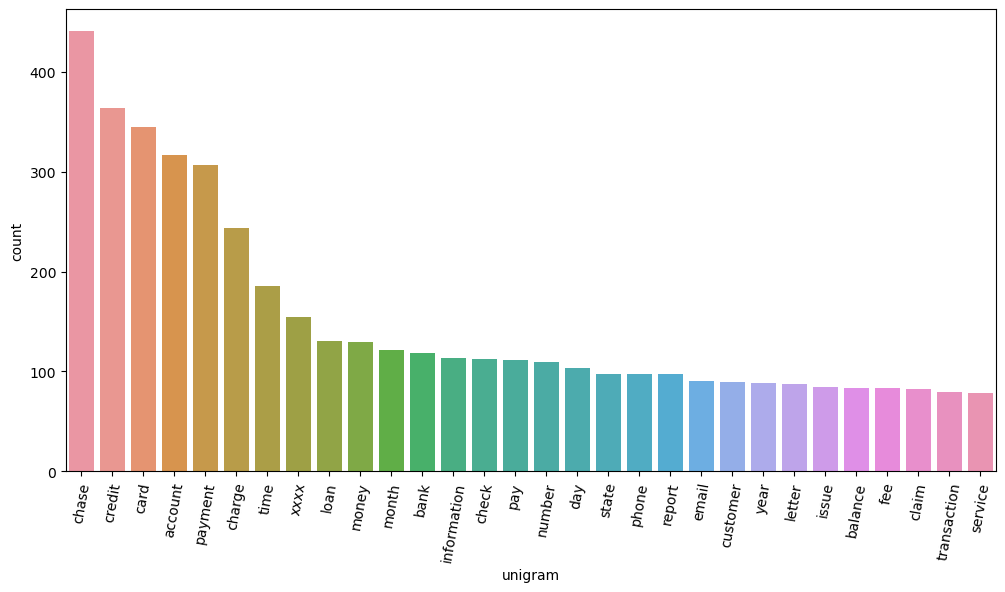

In [228]:
#Plot graph for the top 30 words in the unigram frequency
df1 = pd.DataFrame(top_30_unigrams, columns = ['unigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df1['unigram'], y=df1['count'])
plt.xticks(rotation = 80)
plt.show()

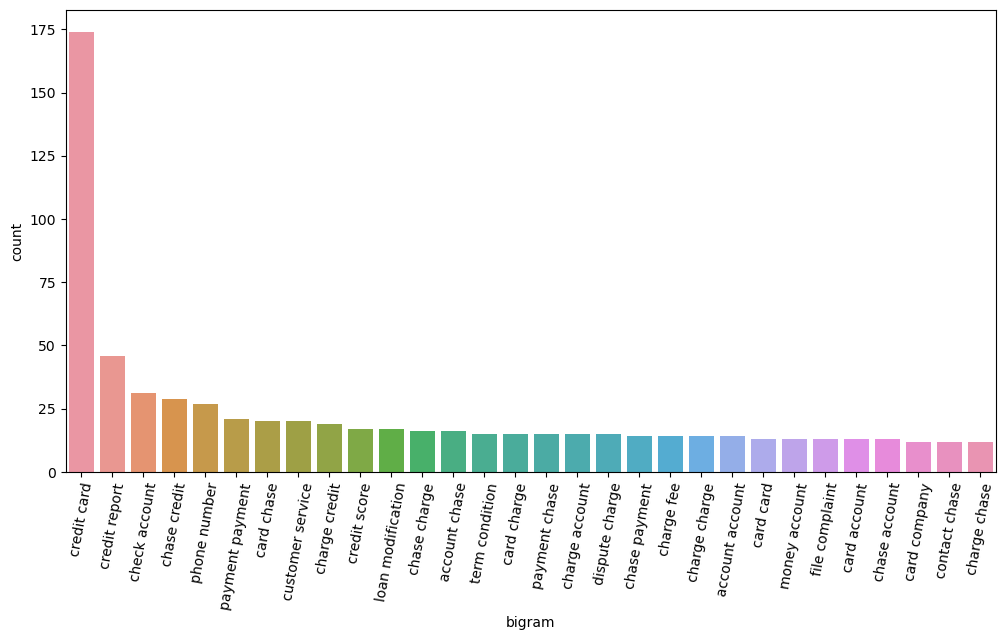

In [229]:
#Plot graph for the top 30 words in the bigram frequency
df2 = pd.DataFrame(top_30_bigrams, columns = ['bigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df2['bigram'], y=df2['count'])
plt.xticks(rotation = 80)
plt.show()

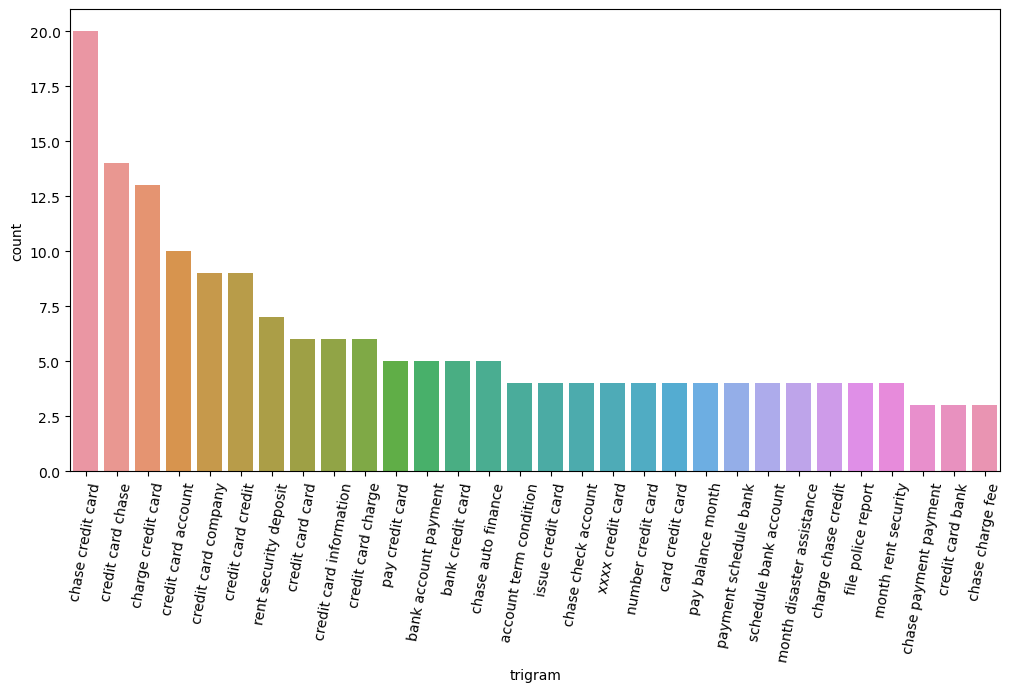

In [230]:
#Plot graph for the top 30 words in the trigram frequency
df3 = pd.DataFrame(top_30_trigrams, columns = ['trigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df3['trigram'], y=df3['count'])
plt.xticks(rotation = 80)
plt.show()

In [231]:
## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis ##
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [232]:
#All masked texts has been removed
df_clean.head()

,complaint_text,lemma,category,Complaint_clean
25189,we closed the refinancing from xxxx xxxx and xxxx xxxx xxxx representative came to our house and we signed all required loan disclosures on xxxx the closing disclosure shows the disbursement of our balance loan payment to chase on and the balance of the mortgage loan as however the xxxx xxxx xxxx representative failed to wire the funds until further the chase payment shows that the actual payment made to chase bank was this means that xxxx xxxx xxxx still holding the our balance of i am unable to get hold of the escrow officer ms xxxx xxxx on telephone and she failed to return my calls in addition xxxx xxxx xxxx failed to respond to my email letters too as of this day \nfailure to return the the overpaid escrow money to the customer even after around four weeks and failure to provide full disclosure of the escrow money and return this to the customer promptly is not only unethical practice but it may be even illegal practice \nnobody seems to respond to my telephone calls and not even my email letters \ni am not sure if they just want to pocket this escrow money \ni hope you may be able to take the appropriate action about such unethical illegal practices of xxxx xxxx xxxxs which is also title company \ni and my wife are retiree and hoping to seek you help on this matter \nthank you for you help and have a great day \nxxxx xxxx my cell tel xxxx xxxx xxxx my email address xxxx xxxx,close refinancing xxxx xxxx xxxx xxxx xxxx representative come house sign require loan disclosure xxxx closing disclosure show disbursement balance loan payment chase balance mortgage loan xxxx xxxx xxxx representative fail wire fund chase payment show actual payment chase bank mean xxxx xxxx xxxx hold balance unable hold escrow officer ms xxxx xxxx telephone fail return call addition xxxx xxxx xxxx fail respond email letter day \n failure return overpaid escrow money customer week failure provide disclosure escrow money return customer promptly unethical practice illegal practice \n respond telephone call email letter \n sure want pocket escrow money \n hope able appropriate action unethical illegal practice xxxx xxxx xxxxs title company \n wife retiree hope seek help matter \n thank help great day \n xxxx xxxx cell tel xxxx xxxx xxxx email address xxxx xxxx,Mortgage+Conventional home mortgage,house sign loan disclosure disclosure balance loan payment wire fund chase payment payment balance escrow officer telephone return call addition failure return escrow money customer week failure disclosure escrow money return customer practice practice telephone call email letter pocket escrow money hope action practice wife help matter day cell address
21554,they closed my account for no apparently reason i had direct deposit come into my account because somebody stole my card and multiple times and he gave me provisional credit each time chase is the worst bank my card number xxxx was supposed to receive a direct deposit on xxxxxxxx its now xxxxxxxx xxxx,close account apparently reason direct deposit come account somebody steal card multiple time give provisional credit time chase bad bank card number xxxx suppose receive direct deposit xxxxxxxx xxxxxxxx xxxx,Checking or savings account+Checking account,account reason deposit somebody card time credit time chase bank card number deposit
43761,chase is misleadingly using the wording balance transfer to mean everything not just transferring a balance from one card to another nowhere in their terms or fees is this noted this is completely misleading and a scam to their customers \n\nthis is a portion of a letter sent to chase and describes the issue at hand we received courtesy access checks in the mail recently and as xxxx we diligently read the terms and conditions very carefully before using any financial product everything was clearly spelled out on the concise paperwork provided i have attached what was in the envelope for your review we were quite surpr

In [233]:
## Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text
# Write your code here to find the top 30 unigram,bigram,trigram frequency 
# among the complaints in the cleaned datafram(df_clean).

def get_top_n_bigram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]

In [234]:
top_30_unigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=3, top=30)

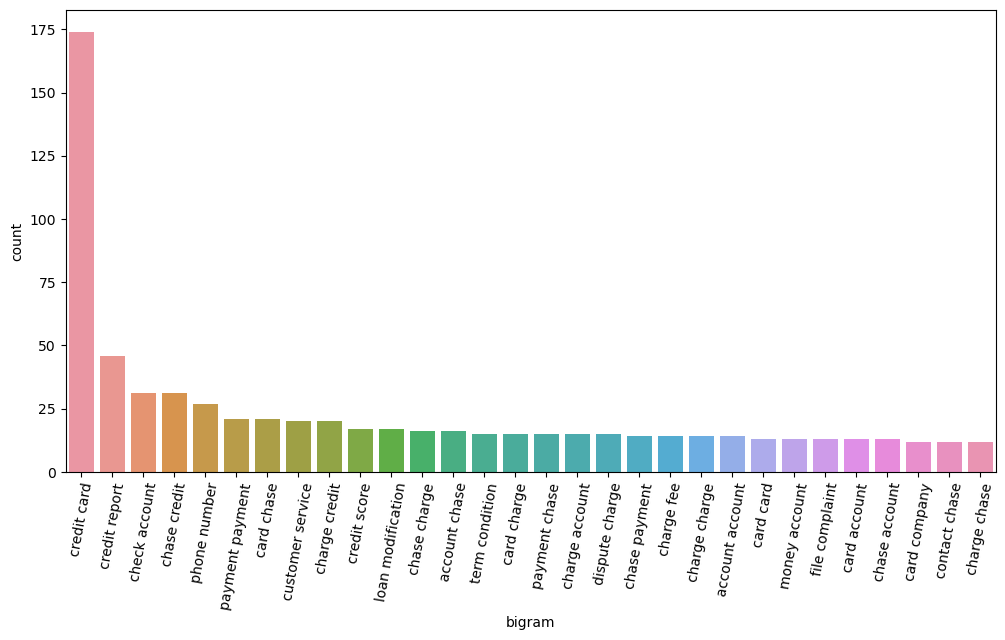

In [235]:
#Plot graph for the top 30 words in the bigram frequency
df2 = pd.DataFrame(top_30_bigrams, columns = ['bigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df2['bigram'], y=df2['count'])
plt.xticks(rotation = 80)
plt.show()


## Feature Extraction ##

In [236]:
'''
Convert the raw texts to a matrix of TF-IDF features

max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words" max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

min_df is used for removing terms that appear too infrequently min_df = 2 means "ignore terms that appear in less than 2 complaints"
'''

'\nConvert the raw texts to a matrix of TF-IDF features\n\nmax_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words" max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"\n\nmin_df is used for removing terms that appear too infrequently min_df = 2 means "ignore terms that appear in less than 2 complaints"\n'

In [237]:
#Write your code here to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

In [238]:
##  Create a document term matrix using fit_transform
## The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score: The tuples that are not there have a tf-idf score of 0

In [239]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean.Complaint_clean) 

In [240]:
tfidf.get_feature_names()[:10]

['ability',
 'abuse',
 'access',
 'accommodate',
 'accord',
 'accordance',
 'account',
 'accounting',
 'acct',
 'acknowledgment']

In [241]:
len(tfidf.get_feature_names())

732

In [242]:
'''
Topic Modelling using NMF
Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

Find the best number of clusters
Apply the best number to create word clusters
Inspect & validate the correction of each cluster wrt the complaints
Correct the labels if needed
Map the clusters to topics/cluster names
'''

'\nTopic Modelling using NMF\nNon-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.\n\nIn this task you have to perform the following:\n\nFind the best number of clusters\nApply the best number to create word clusters\nInspect & validate the correction of each cluster wrt the complaints\nCorrect the labels if needed\nMap the clusters to topics/cluster names\n'

In [243]:
from sklearn.decomposition import NMF

In [244]:
#Load your nmf_model with the n_components i.e 5
num_topics =  5 

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

W1 = nmf_model.fit_transform(dtm)
H1 = nmf_model.components_

In [245]:
#Print the Top15 words for each of the topics
num_words=15

vocab = np.array(tfidf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [246]:
vocab

array(['ability', 'abuse', 'access', 'accommodate', 'accord',
       'accordance', 'account', 'accounting', 'acct', 'acknowledgment',
       'acquire', 'action', 'activity', 'ad', 'addition', 'address',
       'adjustment', 'administration', 'advance', 'advertise', 'advice',
       'advise', 'affidavit', 'afford', 'age', 'agency', 'agent',
       'agreement', 'airline', 'alert', 'analysis', 'answer', 'anytime',
       'apartment', 'apologize', 'appeal', 'application', 'apply',
       'appointment', 'appraisal', 'approach', 'approval', 'approve',
       'area', 'arm', 'arrangement', 'arrival', 'ask', 'assess', 'asset',
       'assist', 'assistance', 'associate', 'assume', 'assurance',
       'assure', 'atm', 'attach', 'attempt', 'attorney', 'auction',
       'authority', 'authorization', 'auto', 'avail', 'avoid', 'bait',
       'balance', 'bank', 'banker', 'banking', 'bankruptcy', 'base',
       'basis', 'beginning', 'behalf', 'behavior', 'believe', 'benefit',
       'bike', 'billing', 

In [247]:
topics

['charge merchant card chase dispute transaction fee purchase balance service claim overdraft documentation fraud hour',
 'credit card report company score chase debt inquiry account limit record application information knowledge issue',
 'payment month statement pay balance report chase car history auto day credit notice date file',
 'account check money branch business deposit chase fund bank phone number day fee time contact',
 'loan mortgage rate year chase modification home information property time document lender response work request']

In [248]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
colnames = ["Topic" + str(i) for i in range(nmf_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(df_clean.Complaint_clean))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.00,0.00,0.14,0.07,0.14,2
Doc1,0.01,0.16,0.00,0.19,0.01,3
Doc2,0.08,0.02,0.01,0.20,0.03,3
Doc3,0.02,0.27,0.00,0.00,0.00,1
Doc4,0.08,0.14,0.00,0.02,0.02,1


In [249]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = significant_topic

In [250]:
pd.set_option('display.max_colwidth', -1)
#df_clean[['complaint_text','Complaint_clean','category','Topic']][df_clean.Topic==2].head(10)

In [251]:
df_clean[['complaint_text','Complaint_clean','category','Topic']][df_clean.Topic==4].head(30)

,complaint_text,Complaint_clean,category,Topic
54226,on xxxxxxxx i received a letter from chase bank stating they transferred my mortgage to xxxx xxxx xxxxmy house located in florida is being in foreclosure since xxxxxxxxand due to some mishaps from chase the foreclosure could nt being accomplish until this dateit seems to my humble understanding in the real estate business that something is going on that hinders the bank to complete the transaction good for me by the wayi have tried many times to come to a solution to bring my mortgage to a good stand but the bank is not cooperating at all so i being batling against the system on my own and thankfully has being working so far but i am affraid the time is running outi need to have a selling document from hud so i can take them to court xxxx xxxx chase xxxx xxxx and possibly hud to prove something is not right with the time of selling etc hud is not cooperating with me and they just give me their website to search for a topic related under the xxxx to fill up a form and send it so i can get the information i needi have tried with their website i can not find anything related to what i needin the mean time i have xxxx banks fighting for my place and none of them have the right documentationplease i have the premonition something is just not right and i need at least this document from hud to at least find out who legally owns the property and when it was sold and by whommy house is not on any real estate listing and is being in this situation for xxxx years i am behind payments since xxxxxxxx i paid xxxx of those companies that promise to stop or mediate to avoid foreclosure but i got robed and lost thank you kindly for your help,state transfer mortgage foreclosure dateit understanding estate business bank transaction wayi time solution mortgage stand bank cooperate batle system time outi need document time cooperate website search topic form website needin place premonition right document property sell estate listing situation company promise mediate avoid foreclosure get robe help,Mortgage+FHA mortgage,4
12221,we have our current mortgage with chase home finance have excellent payment history we kept getting letters about refinancing at a lower interest rate when i did call the rate was not as low as my letter but they could still get us a lower rate than we currently have and less years they describe the letter as marketing projections done months in advance so we paid the application fee signed paperwork and locked in at and zero points we kept having to get a bunch of extra documents to underwriting which was annoying but understandable jpmorgan chase changed the year xxxx point and to years xxxx points and then after the appraisal came back they changed it to years and xxxx points it would cost us xxxx to get a worse mortgage than what we had and the letter we got explained that this was based on my husbands credit score which in the next paragraph stated his credit score is xxxx the interest rates had fallen since we started trying to refinance when i asked about changing our rate lower i was told for better or worse we were locked in but according to the paperwork we signed we should have also been locked in on points,mortgage chase home finance payment history letter refinance interest rate rate letter rate year month advance pay application fee sign point bunch document underwriting change year point appraisal change year point cost mortgage letter base husband credit paragraph state credit score interest rate fall start refinance change rate lock accord paperwork sign point,Mortgage+Conventional fixed mortgage,4
34201,i modified my mortgage i had my own home owners insurance and chase added their mandatory insurance chase refused the payments for the amount stated both in my modification and on my statements after speaking to several reps xxxx rep stated the modification was not executed properly on chases end and they would fix it by sending out new docs docs were ne

In [252]:
df_clean[['complaint_text','Complaint_clean','category','Topic']][df_clean.Topic==3].head(30)

,complaint_text,Complaint_clean,category,Topic
21554,they closed my account for no apparently reason i had direct deposit come into my account because somebody stole my card and multiple times and he gave me provisional credit each time chase is the worst bank my card number xxxx was supposed to receive a direct deposit on xxxxxxxx its now xxxxxxxx xxxx,account reason deposit somebody card time credit time chase bank card number deposit,Checking or savings account+Checking account,3
43761,chase is misleadingly using the wording balance transfer to mean everything not just transferring a balance from one card to another nowhere in their terms or fees is this noted this is completely misleading and a scam to their customers \n\nthis is a portion of a letter sent to chase and describes the issue at hand we received courtesy access checks in the mail recently and as xxxx we diligently read the terms and conditions very carefully before using any financial product everything was clearly spelled out on the concise paperwork provided i have attached what was in the envelope for your review we were quite surprised then after using one of the checks that we received a transactionservice fee of on the check immediately upon seeing this on my statement i went through my files to reread the terms and conditions of the checks of which i still have \n\nabsolutely nowhere on the paperwork provided by chase was there a mention of a service fee applying on anything other than balance transfers from other credit cards to chase i did nt hesitate in calling the number on the back of my card and after wading through the prompts to finally access a living breathing representative she said there was very clearly printed on the checks all the terms and conditions i kindly let her know i had the checks right in front of me and there was no such print anywhere she said it was in the paperwork of which i read her the entire sheet included with the checks proving otherwise and asked to elevate the case \ni was transferred to a supervisor and placed on hold for over xxxx minutes while they brought up my account xxxx of which she said she does nt give her last name or even it s initial in xxxx xxxx told me that the terms and conditions clearly stated that i would pay a or service fee on balance transfers to which i responded this check did not do she said that it would have stated on the front of back of the check that anytime i used one i would be charged a transaction fee to which i again stated i had the checks in front of me and even read everything they said from top to bottom there was not even a hint at what they were telling me she then stated the terms and conditions said a service fee anytime i used a check to which i read her the entire box listed interest and fee information off chase s literature included with the checks absolutely nowhere does it mention what they were saying was mentioned nor could they access that particular document she said i needed to fax executive offices and gave me an address and fax number before ushering me off the phone \nmy wife called and was given an equally frustrating runaround she also read the entire document aloud to a representative xxxx a supervisor who also stated she could nt locate that particular document to verify what my wife read was correct xxxx stated that she had dealt with this exact issue a couple of times recently so obviously we are not the only ones who were mislead by your marketingbusiness practices after getting the runaround for xxxx or so minutes my wife asked to speak to someone higher and was told xxxx was a supervisor and as high as you get over the phone she was then issued a differing address and fax number to the one i received \nkeep in mind we wrote the check for on and paid the balance off on it today before calling your representatives had it been stated anywhere whatsoever on your paperwork that there was a fee associated with these checks we would never have written the che

In [253]:
#Print the first 10 Complaint for each of the Topics
temp =df_clean[['complaint_text','Complaint_clean','category','Topic']].groupby('Topic').head(10)
temp.sort_values('Topic')

,complaint_text,Complaint_clean,category,Topic
29925,on xxxx xxxx i charged for xxxx xxxx despite insufficient funds and chase accepted the transaction only to gauge me with in overdraft fees so again chase has overdrafted me despite my opting out this is now like the xxxx and xxxx time of overdraft coverage now this time is a little different because it says in the overdraft fee that the xxxx charges were repeating charges but this ca nt be the end of the story because xxxx checks every card it uses to authorize it when it uses it it s simply a slippery way for chase to make an obscene amount of money off of a broke college student again of course they always check that s how the transaction gets processed they have to because the charge is variable just like a xxxx purchase it is not a uniform repeating charge and chase s advertising is both slippery and false and difficult to understand for the average consumer in this context i do nt have the means to pay the extra charges and the xxxx should ve been denied i would ve just used my other card xxxx had i known that i needless to say i will be using another bank after this issue gets resolved or a credit union \n\nand i understand that xxxx charges are variable and that makes the whole thing more complicated but it turns out i had well under the minimum xxxx charge in my account and so the transaction should ve been denied,fund chase transaction overdraft fee chase overdraft coverage time overdraft fee charge repeat charge end story check card use use way money college student course transaction process charge variable purchase repeat charge chase advertising understand consumer context charge card bank issue union charge variable thing turn charge account transaction,Bank account or service+Checking account,0
47189,i purchased a resume writing service from xxxx xxxx xxxx an online resume writing service provider using my chase preferred credit card \ni received first draft of the resume in different formats \ni sent them an email and told them i am not happy with the resume \ni sent another email and told them im not satisfied \ni got another version change from the service provider \ni sent them an email and told them this resume isnt working for me \ni got an email from the service provider that i was supposed to receive a call xxxx the owner i guess will call me \ni sent another email and told them i didnt get a call from anyone \nno response from them from here on i opened a dispute with chase case xxxx between and xxxx xxxx from chase and i played phone tags we left at least voicemails for each other she was looking for information we were able to speak only twice and i provided information she needed once when i called i didnt have credit card on me so i couldnt verify the cc as a result she didnt provide any service that day \n\ni called to report that ive misplaced my cc and also discuss this dispute with someone xxxx was the new specialist that tried to help me \n\nsummary of our conversation on after providing all the information he asked for he put me on hold to try to get hold of the resume service provider xxxx xxxx xxxx they didnt answer he came back on line and asked me to call him every hour so he can try to get a hold of the service provider i asked why he cant call and talk to them without having me on the phone he said call volumes are so high and chase cant do that and since service has been rendered they cant just refund me \n\ni argued that service i received isnt a service i was promised and im not satisfied he kept repeating him self \n\nso i would like to file a complaint against chase and how they handle dispute,purchase resume write service service provider chase credit card draft format email resume email tell version change provider email resume work email service provider email response dispute chase case phone tag leave information information credit card result service day call report misplace dispute conversation information hold resume servi

In [254]:
'''
After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
Bank Account services
Credit card or prepaid card
Theft/Dispute Reporting
Mortgage/Loan
Others
'''

'\nAfter evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:\nBank Account services\nCredit card or prepaid card\nTheft/Dispute Reporting\nMortgage/Loan\nOthers\n'

In [255]:
#Create the dictionary of Topic names and Topics

topic_mapping = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan'
}
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(topic_mapping)
df_clean.head()

,complaint_text,lemma,category,Complaint_clean,Topic
25189,we closed the refinancing from xxxx xxxx and xxxx xxxx xxxx representative came to our house and we signed all required loan disclosures on xxxx the closing disclosure shows the disbursement of our balance loan payment to chase on and the balance of the mortgage loan as however the xxxx xxxx xxxx representative failed to wire the funds until further the chase payment shows that the actual payment made to chase bank was this means that xxxx xxxx xxxx still holding the our balance of i am unable to get hold of the escrow officer ms xxxx xxxx on telephone and she failed to return my calls in addition xxxx xxxx xxxx failed to respond to my email letters too as of this day \nfailure to return the the overpaid escrow money to the customer even after around four weeks and failure to provide full disclosure of the escrow money and return this to the customer promptly is not only unethical practice but it may be even illegal practice \nnobody seems to respond to my telephone calls and not even my email letters \ni am not sure if they just want to pocket this escrow money \ni hope you may be able to take the appropriate action about such unethical illegal practices of xxxx xxxx xxxxs which is also title company \ni and my wife are retiree and hoping to seek you help on this matter \nthank you for you help and have a great day \nxxxx xxxx my cell tel xxxx xxxx xxxx my email address xxxx xxxx,close refinancing xxxx xxxx xxxx xxxx xxxx representative come house sign require loan disclosure xxxx closing disclosure show disbursement balance loan payment chase balance mortgage loan xxxx xxxx xxxx representative fail wire fund chase payment show actual payment chase bank mean xxxx xxxx xxxx hold balance unable hold escrow officer ms xxxx xxxx telephone fail return call addition xxxx xxxx xxxx fail respond email letter day \n failure return overpaid escrow money customer week failure provide disclosure escrow money return customer promptly unethical practice illegal practice \n respond telephone call email letter \n sure want pocket escrow money \n hope able appropriate action unethical illegal practice xxxx xxxx xxxxs title company \n wife retiree hope seek help matter \n thank help great day \n xxxx xxxx cell tel xxxx xxxx xxxx email address xxxx xxxx,Mortgage+Conventional home mortgage,house sign loan disclosure disclosure balance loan payment wire fund chase payment payment balance escrow officer telephone return call addition failure return escrow money customer week failure disclosure escrow money return customer practice practice telephone call email letter pocket escrow money hope action practice wife help matter day cell address,Others
21554,they closed my account for no apparently reason i had direct deposit come into my account because somebody stole my card and multiple times and he gave me provisional credit each time chase is the worst bank my card number xxxx was supposed to receive a direct deposit on xxxxxxxx its now xxxxxxxx xxxx,close account apparently reason direct deposit come account somebody steal card multiple time give provisional credit time chase bad bank card number xxxx suppose receive direct deposit xxxxxxxx xxxxxxxx xxxx,Checking or savings account+Checking account,account reason deposit somebody card time credit time chase bank card number deposit,Theft/Dispute Reporting
43761,chase is misleadingly using the wording balance transfer to mean everything not just transferring a balance from one card to another nowhere in their terms or fees is this noted this is completely misleading and a scam to their customers \n\nthis is a portion of a letter sent to chase and describes the issue at hand we received courtesy access checks in the mail recently and as xxxx we diligently read the terms and conditions very carefully before using any financial product everything was clearly spelled out on the concise paperwork provided i have attached what was in the envelop

<AxesSubplot:xlabel='Topic', ylabel='count'>

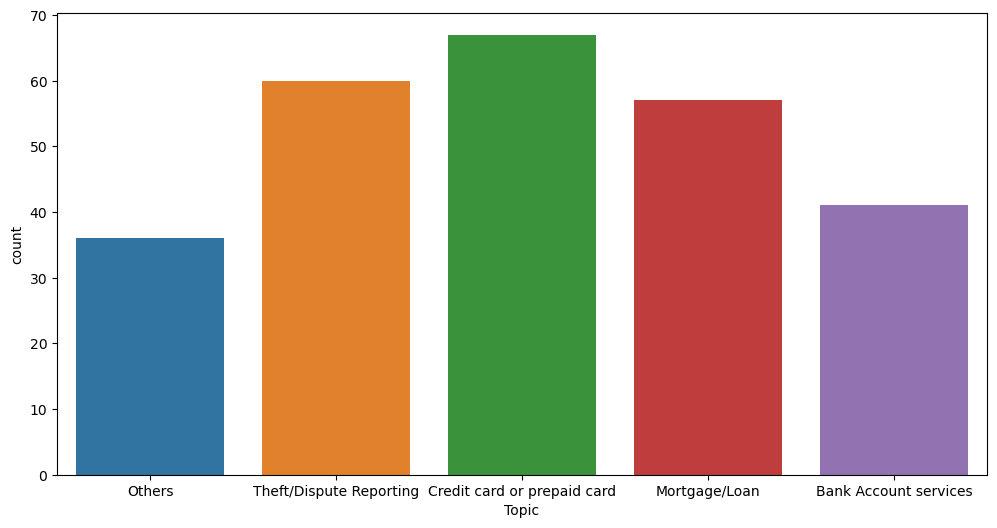

In [256]:
# Plot graph to check class imbalance
plt.figure(figsize=(12,6))
sns.countplot(x='Topic',data=df_clean)

In [257]:
df_clean_topic_percentage = df_clean['Topic'].value_counts() / len(df_clean.Topic)

In [258]:
df_clean_topic_percentage 

Credit card or prepaid card    0.256705
Theft/Dispute Reporting        0.229885
Mortgage/Loan                  0.218391
Bank Account services          0.157088
Others                         0.137931
Name: Topic, dtype: float64

## Supervised model to predict any new complaints to the relevant Topics

In [259]:
training_data = df_clean[['complaint_text','Topic']]

In [260]:
training_data.head()

,complaint_text,Topic
25189,we closed the refinancing from xxxx xxxx and xxxx xxxx xxxx representative came to our house and we signed all required loan disclosures on xxxx the closing disclosure shows the disbursement of our balance loan payment to chase on and the balance of the mortgage loan as however the xxxx xxxx xxxx representative failed to wire the funds until further the chase payment shows that the actual payment made to chase bank was this means that xxxx xxxx xxxx still holding the our balance of i am unable to get hold of the escrow officer ms xxxx xxxx on telephone and she failed to return my calls in addition xxxx xxxx xxxx failed to respond to my email letters too as of this day \nfailure to return the the overpaid escrow money to the customer even after around four weeks and failure to provide full disclosure of the escrow money and return this to the customer promptly is not only unethical practice but it may be even illegal practice \nnobody seems to respond to my telephone calls and not even my email letters \ni am not sure if they just want to pocket this escrow money \ni hope you may be able to take the appropriate action about such unethical illegal practices of xxxx xxxx xxxxs which is also title company \ni and my wife are retiree and hoping to seek you help on this matter \nthank you for you help and have a great day \nxxxx xxxx my cell tel xxxx xxxx xxxx my email address xxxx xxxx,Others
21554,they closed my account for no apparently reason i had direct deposit come into my account because somebody stole my card and multiple times and he gave me provisional credit each time chase is the worst bank my card number xxxx was supposed to receive a direct deposit on xxxxxxxx its now xxxxxxxx xxxx,Theft/Dispute Reporting
43761,chase is misleadingly using the wording balance transfer to mean everything not just transferring a balance from one card to another nowhere in their terms or fees is this noted this is completely misleading and a scam to their customers \n\nthis is a portion of a letter sent to chase and describes the issue at hand we received courtesy access checks in the mail recently and as xxxx we diligently read the terms and conditions very carefully before using any financial product everything was clearly spelled out on the concise paperwork provided i have attached what was in the envelope for your review we were quite surprised then after using one of the checks that we received a transactionservice fee of on the check immediately upon seeing this on my statement i went through my files to reread the terms and conditions of the checks of which i still have \n\nabsolutely nowhere on the paperwork provided by chase was there a mention of a service fee applying on anything other than balance transfers from other credit cards to chase i did nt hesitate in calling the number on the back of my card and after wading through the prompts to finally access a living breathing representative she said there was very clearly printed on the checks all the terms and conditions i kindly let her know i had the checks right in front of me and there was no such print anywhere she said it was in the paperwork of which i read her the entire sheet included with the checks proving otherwise and asked to elevate the case \ni was transferred to a supervisor and placed on hold for over xxxx minutes while they brought up my account xxxx of which she said she does nt give her last name or even it s initial in xxxx xxxx told me that the terms and conditions clearly stated that i would pay a or service fee on balance transfers to which i responded this check did not do she said that it would have stated on the front of back of the check that anytime i used one i would be charged a transaction fee to which i again stated i had the checks in front of me and even read everything they said from top to bottom there was not even a hint at what they were telling me she then stated the terms and conditions said a service fee an

In [261]:
## Reverse topic names mapping for supervised learning

reverse_topic_mapping = {
    'Bank Account services' :0,
    'Credit card or prepaid card':1,
    'Others':2,
    'Theft/Dispute Reporting':3,
    'Mortgage/Loan':4
}
#Replace Topics with Topic Names
training_data['Topic'] = training_data['Topic'].map(reverse_topic_mapping)
training_data.head()

,complaint_text,Topic
25189,we closed the refinancing from xxxx xxxx and xxxx xxxx xxxx representative came to our house and we signed all required loan disclosures on xxxx the closing disclosure shows the disbursement of our balance loan payment to chase on and the balance of the mortgage loan as however the xxxx xxxx xxxx representative failed to wire the funds until further the chase payment shows that the actual payment made to chase bank was this means that xxxx xxxx xxxx still holding the our balance of i am unable to get hold of the escrow officer ms xxxx xxxx on telephone and she failed to return my calls in addition xxxx xxxx xxxx failed to respond to my email letters too as of this day \nfailure to return the the overpaid escrow money to the customer even after around four weeks and failure to provide full disclosure of the escrow money and return this to the customer promptly is not only unethical practice but it may be even illegal practice \nnobody seems to respond to my telephone calls and not even my email letters \ni am not sure if they just want to pocket this escrow money \ni hope you may be able to take the appropriate action about such unethical illegal practices of xxxx xxxx xxxxs which is also title company \ni and my wife are retiree and hoping to seek you help on this matter \nthank you for you help and have a great day \nxxxx xxxx my cell tel xxxx xxxx xxxx my email address xxxx xxxx,2
21554,they closed my account for no apparently reason i had direct deposit come into my account because somebody stole my card and multiple times and he gave me provisional credit each time chase is the worst bank my card number xxxx was supposed to receive a direct deposit on xxxxxxxx its now xxxxxxxx xxxx,3
43761,chase is misleadingly using the wording balance transfer to mean everything not just transferring a balance from one card to another nowhere in their terms or fees is this noted this is completely misleading and a scam to their customers \n\nthis is a portion of a letter sent to chase and describes the issue at hand we received courtesy access checks in the mail recently and as xxxx we diligently read the terms and conditions very carefully before using any financial product everything was clearly spelled out on the concise paperwork provided i have attached what was in the envelope for your review we were quite surprised then after using one of the checks that we received a transactionservice fee of on the check immediately upon seeing this on my statement i went through my files to reread the terms and conditions of the checks of which i still have \n\nabsolutely nowhere on the paperwork provided by chase was there a mention of a service fee applying on anything other than balance transfers from other credit cards to chase i did nt hesitate in calling the number on the back of my card and after wading through the prompts to finally access a living breathing representative she said there was very clearly printed on the checks all the terms and conditions i kindly let her know i had the checks right in front of me and there was no such print anywhere she said it was in the paperwork of which i read her the entire sheet included with the checks proving otherwise and asked to elevate the case \ni was transferred to a supervisor and placed on hold for over xxxx minutes while they brought up my account xxxx of which she said she does nt give her last name or even it s initial in xxxx xxxx told me that the terms and conditions clearly stated that i would pay a or service fee on balance transfers to which i responded this check did not do she said that it would have stated on the front of back of the check that anytime i used one i would be charged a transaction fee to which i again stated i had the checks in front of me and even read everything they said from top to bottom there was not even a hint at what they were telling me she then stated the terms and conditions said a service fee anytime i used a check to whi

In [262]:
training_data[['complaint_text','Topic']][training_data.Topic==2].head(30)

,complaint_text,Topic
25189,we closed the refinancing from xxxx xxxx and xxxx xxxx xxxx representative came to our house and we signed all required loan disclosures on xxxx the closing disclosure shows the disbursement of our balance loan payment to chase on and the balance of the mortgage loan as however the xxxx xxxx xxxx representative failed to wire the funds until further the chase payment shows that the actual payment made to chase bank was this means that xxxx xxxx xxxx still holding the our balance of i am unable to get hold of the escrow officer ms xxxx xxxx on telephone and she failed to return my calls in addition xxxx xxxx xxxx failed to respond to my email letters too as of this day \nfailure to return the the overpaid escrow money to the customer even after around four weeks and failure to provide full disclosure of the escrow money and return this to the customer promptly is not only unethical practice but it may be even illegal practice \nnobody seems to respond to my telephone calls and not even my email letters \ni am not sure if they just want to pocket this escrow money \ni hope you may be able to take the appropriate action about such unethical illegal practices of xxxx xxxx xxxxs which is also title company \ni and my wife are retiree and hoping to seek you help on this matter \nthank you for you help and have a great day \nxxxx xxxx my cell tel xxxx xxxx xxxx my email address xxxx xxxx,2
55772,jp morgan chase the issuer of my xxxx xxxx card charged me late fee because they claim i did not make the minimum payment of for the billing cycle ending xxxxxxxx on time this is a false claim my total balance for the previous cycle ending on xxxxxxxx was only but i paid meaning i had credit with chase to be applied for the next month xxxxxxxx chase recorded the payment on xxxxxxxx during the next cycle i used the card for other purchases for a total of chase applied the cash credit from previous cycle and my balance came to about so the of my money that i had at chase was used and credited toward my xxxxxxxx billing cycle therefore i had the peace of mind that i did not have to worry about the minimum payment and did not make one however chase still charged me late fee because they claim that even though they had my money and that money was used as a payment to my account that does not count as a payment this is unfair business practice and i am sure i am not the only victim of this kind of creative accounting by chase in my view since at the beginning of the billing cycle i did not owe anything on my account and actually chase owed me then they can not claim and late payment against me during the next cycle,2
54637,i submitted through jpmorgan chase a request to pay xxxx xxxx on xxxx xxxx this request was made through my checking account using online billpay i have previously made payments to xxxx over the last year and half as he is my newspaper carrier the address it is sent to is in the city i reside there has never been a problem until now on xxxx xxxx i received a notice from chase saying they had the payment under review for xxxx and would not process until i provided his name address both which they had date of birth place of birth and nationality i explained i had no info and he was my newspaper carrier and wanted to know why after paying him for years every months this was necessary as i was authorizing this payment and it was being sent xxxx miles from my house as he provided me a service delivering me a newspaper again no answer was forthcoming and no payment has been sent i have called chase timesand received no satisfaction i understand the need to guard against money laundering but this is overboard a repeating minimal payment i m authorizing and have authorized in the past which were processed without a problem sent locally feels like chase is either incompetent or engaging xxxx profiling i am filing this complaint because i received no answers from chase after multiple calls and a visit to the bra

In [263]:
## Creating X-y split ##
X = training_data.complaint_text
y = training_data.Topic

In [264]:
y

25189    2
21554    3
43761    3
49072    1
29109    1
18309    3
54226    4
55772    2
12221    4
11689    3
34201    4
29812    4
11328    1
54765    3
54637    2
33244    4
71603    3
25492    0
7704     1
12353    0
47189    0
29319    3
17816    2
55514    3
29925    0
1748     4
71872    0
53839    1
32316    2
32676    3
70731    2
53740    0
28113    1
70955    3
40087    4
55913    0
17788    1
11094    3
77217    3
69457    1
75445    2
21738    3
44150    4
58041    1
76808    1
22046    0
54173    4
17840    2
28593    1
19799    1
129      0
11617    3
14074    1
1812     1
47363    1
64912    0
8939     1
75531    4
54729    4
29782    3
77183    1
17414    2
48999    4
19673    1
6224     1
78214    3
57892    3
53972    4
30538    0
6686     3
54575    4
10935    3
22386    1
19912    3
70577    4
70223    3
21040    3
40005    0
72409    2
54061    2
22935    1
21348    1
246      3
71877    1
54070    4
24283    4
72111    0
8782     4
70629    4
18203    3
21907    1

In [265]:
#Write your code to get the Vector count 

# Fit transform the X
count_vect = CountVectorizer()
X_vect = count_vect.fit_transform(X)

In [266]:
from sklearn.feature_extraction.text import TfidfTransformer
#Write your code here to transform the word vector to tf-idf
#Fit transform word vector to TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vect)

In [267]:
X_tfidf.shape

(261, 4432)

In [268]:
count_vect

CountVectorizer()

In [269]:
X_vect

<261x4432 sparse matrix of type '<class 'numpy.int64'>'
	with 28766 stored elements in Compressed Sparse Row format>

In [270]:
## train - test split ##
from sklearn.model_selection import train_test_split
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,random_state=20,test_size=0.25)

In [271]:
y_test.shape

(66,)

In [272]:
## Try at least 3 models on the train and test data from these options
'''
1. Logistic Regression
2. Decision tree
3. Random forest
4. Naive Bayes
'''

'\n1. Logistic Regression\n2. Decision tree\n3. Random forest\n4. Naive Bayes\n'

In [273]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [274]:
def display_classification_report(model,metric):
    
    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)
    print(y_test_pred_proba.shape, y_test.shape)
    roc_auc_score_train = round(roc_auc_score(y_train, y_train_pred_proba,average='weighted',multi_class='ovr'),2)
    roc_auc_score_test = round(roc_auc_score(y_test, y_test_pred_proba,average='weighted',multi_class='ovr'),2)
    print("ROC AUC Score Train:", roc_auc_score_train)
    print("ROC AUC Score Test:", roc_auc_score_test)
    metric.append(roc_auc_score_train)
    metric.append(roc_auc_score_test)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
  
    precision_train,recall_train,fscore_train,support_train=precision_recall_fscore_support(y_train,y_train_pred,average='weighted')
    precision_test,recall_test,fscore_test,support_test=precision_recall_fscore_support(y_test,y_test_pred,average='weighted')
    
    acc_score_train = round(accuracy_score(y_train,y_train_pred),2)
    acc_score_test = round(accuracy_score(y_test,y_test_pred),2)
    
    metric.append(acc_score_train)
    metric.append(acc_score_test)
    metric.append(round(precision_train,2))
    metric.append(round(precision_test,2))
    metric.append(round(recall_train,2))
    metric.append(round(recall_test,2))
    metric.append(round(fscore_train,2))
    metric.append(round(fscore_test,2))
    
    print('Train Accuracy :',acc_score_train)
    print('Test Accuracy :',acc_score_test)
        
    model_report_train = classification_report(y_train,y_train_pred)
    model_report_test = classification_report(y_test,y_test_pred)
    
    print('Classification Report for Train:\n',model_report_train)
    print('Classification Report for Test:\n',model_report_test)


    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(12, 8))
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    cmp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    cmp.plot(ax=ax)
    plt.xticks(rotation=80)

    plt.show();

In [193]:
y_test_pred_proba = mnb.predict_proba(X_test)
yy = [0, 1, 2, 3, 4, 1]
roc_auc_score_test = round(roc_auc_score(yy, y_test_pred_proba,average='weighted',multi_class='ovr'),2)

In [189]:
y_pred = mnb.predict(X_test)
accuracy_score(y_test, y_pred)

0.5

In [192]:
y_test

17771    1
34951    0
47805    4
22488    1
48846    0
40014    0
Name: Topic, dtype: int64

In [275]:
 from sklearn.model_selection import KFold

In [276]:
# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 20)

In [277]:
# utility method to get the GridSearchCV object
def grid_search(model,folds,params,scoring):
    
    grid_search = GridSearchCV(model,
                                cv=folds, 
                                param_grid=params, 
                                scoring=scoring, 
                                n_jobs=-1, verbose=1)
    return grid_search

In [278]:
# utility function to display the best score and parameters of the GridSearchCV model
def print_best_score_params(model):
    print("Best Score: ", model.best_score_)
    print("Best Hyperparameters: ", model.best_params_)

## Multinomial Naive Bayes ##

(66, 5) (66,)
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.93
Train Accuracy : 0.69
Test Accuracy : 0.38
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       0.49      1.00      0.66        56
           2       0.00      0.00      0.00        25
           3       0.96      1.00      0.98        44
           4       1.00      0.83      0.91        41

    accuracy                           0.69       195
   macro avg       0.69      0.57      0.52       195
weighted avg       0.72      0.69      0.61       195

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.22      1.00      0.37        11
           2       0.00      0.00      0.00        11
           3       0.73      0.50      0.59        16
           4       1.00      0.38      0.55        16

    accurac

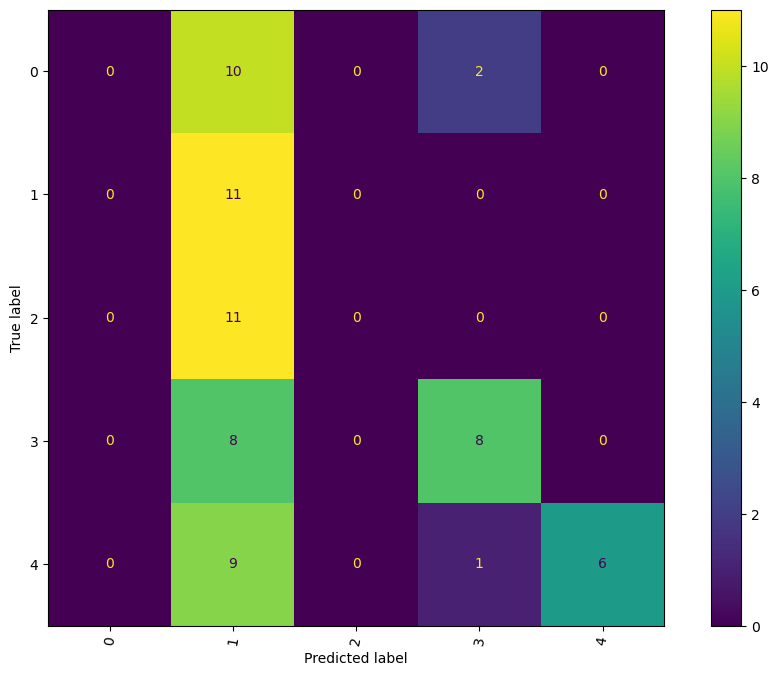

In [279]:
## Multinomial Naive Bayes model ##
mnb = MultinomialNB()
# fit model
mnb.fit(X_train, y_train)
# display classification report
metric1=[]
display_classification_report(mnb,metric1)

## Logistic Regression Classification ##

(66, 5) (66,)
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.92
Train Accuracy : 0.97
Test Accuracy : 0.64
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.90      1.00      0.95        56
           2       1.00      0.88      0.94        25
           3       1.00      1.00      1.00        44
           4       1.00      1.00      1.00        41

    accuracy                           0.97       195
   macro avg       0.98      0.96      0.97       195
weighted avg       0.97      0.97      0.97       195

Classification Report for Test:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.44      1.00      0.61        11
           2       1.00      0.09      0.17        11
           3       0.78      0.88      0.82        16
           4       0.67      0.75      0.71        16

    accurac

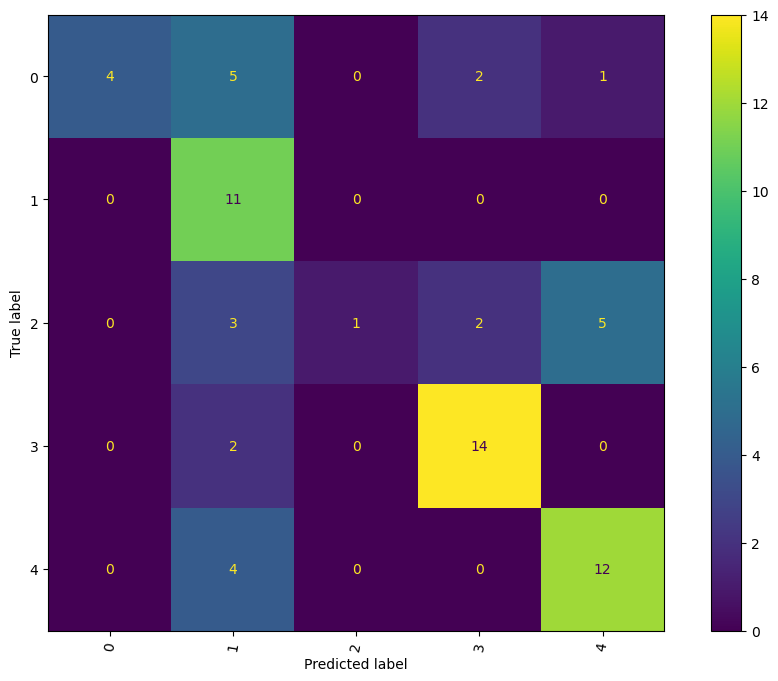

In [280]:
## Logistic Regression Classification ##
# Logistic Regression Classification
log_reg = LogisticRegression(random_state=40,solver='liblinear')
# fit model
log_reg.fit(X_train,y_train)
# display classification report
metric2=[]
display_classification_report(log_reg,metric2)


## Decision Tree Classification ##

(66, 5) (66,)
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.76
Train Accuracy : 1.0
Test Accuracy : 0.62
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        44
           4       1.00      1.00      1.00        41

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.43      0.82      0.56        11
           2       0.83      0.45      0.59        11
           3       0.67      0.62      0.65        16
           4       0.71      0.62      0.67        16

    accuracy

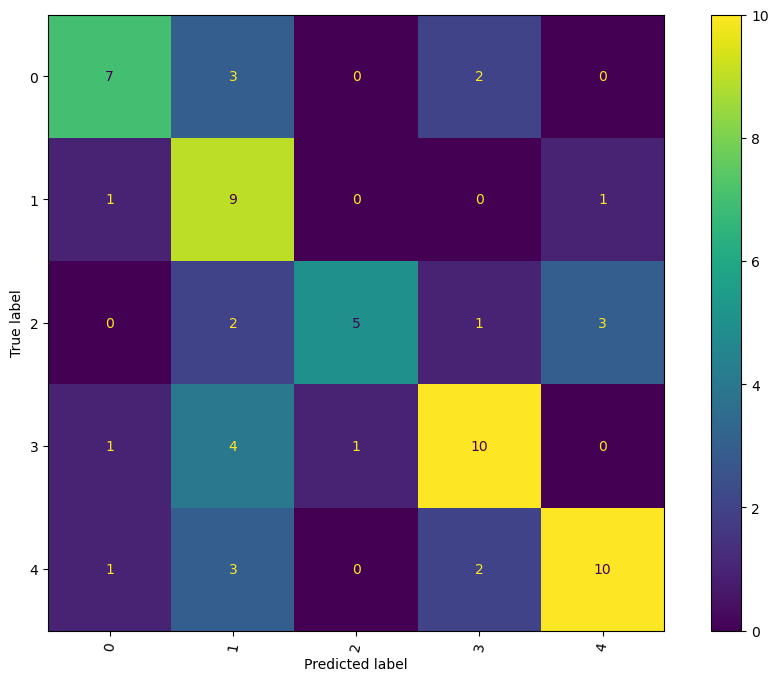

In [281]:
# Decision Tree Classification
dtc = DecisionTreeClassifier(random_state=40)
# fit model
dtc.fit(X_train,y_train)
# Decision Tree Classification Report
metric3=[]
display_classification_report(dtc,metric3)

## Random Forest Classification ##

OOB SCORE : 0.6358974358974359
(66, 5) (66,)
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.94
Train Accuracy : 1.0
Test Accuracy : 0.7
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        44
           4       1.00      1.00      1.00        41

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

Classification Report for Test:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.42      1.00      0.59        11
           2       0.67      0.18      0.29        11
           3       0.92      0.75      0.83        16
           4       0.81      0.81    

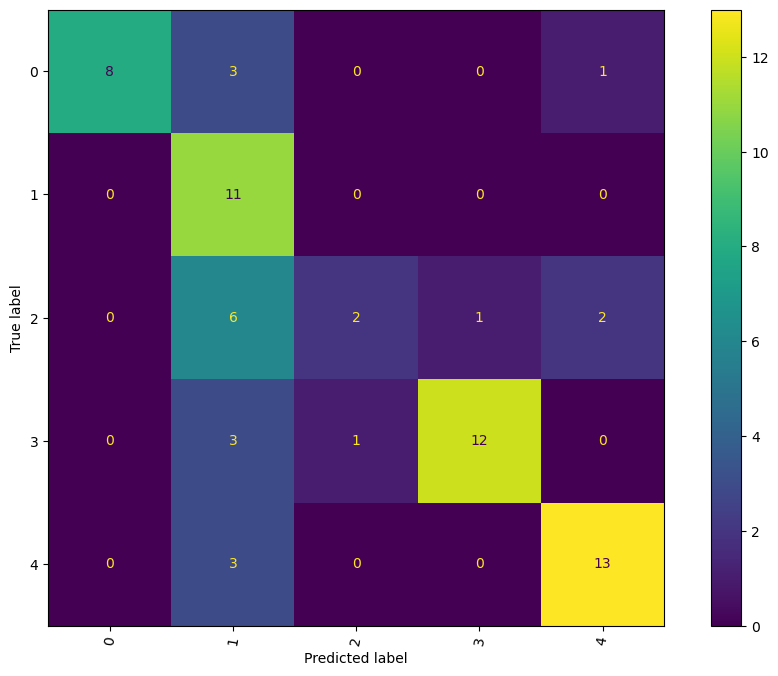

In [282]:

rf = RandomForestClassifier(n_estimators = 500,random_state=40, n_jobs = -1,oob_score=True)
# fit model
rf.fit(X_train,y_train)

# oob score
print('OOB SCORE :',rf.oob_score_)

# Random Forest Classification Report
metric4=[]
display_classification_report(rf,metric4)

## xgboost ##

In [283]:
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier


In [284]:
from xgboost.sklearn import XGBClassifier

In [285]:
xgb = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)

[16:35:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(66, 5) (66,)
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.95
Train Accuracy : 1.0
Test Accuracy : 0.76
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        44
           4       1.00      1.00      1.00        41

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

Classification Report for Test:
           

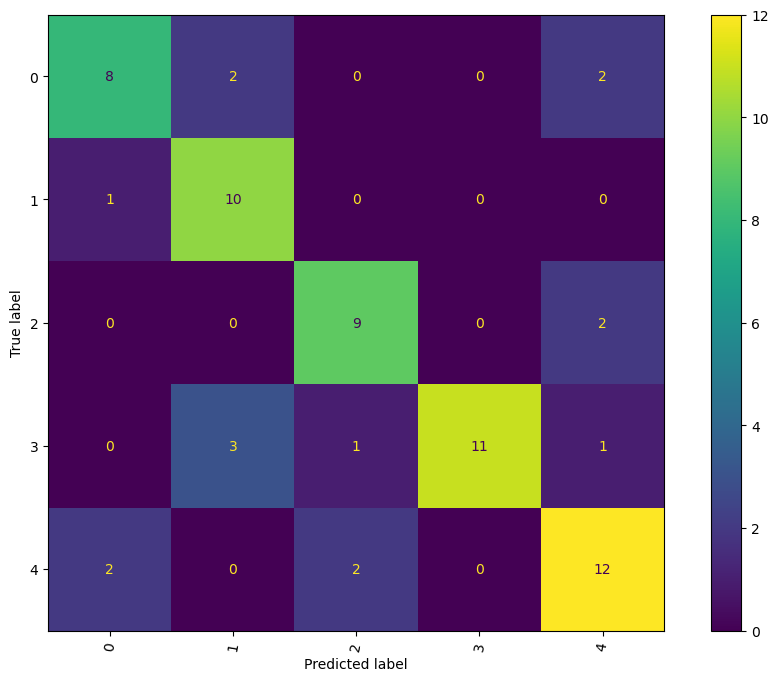

In [286]:
# fit model
xgb.fit(X_train,y_train)
# display classification report
metric5=[]
display_classification_report(xgb,metric5)

## KNN ##

In [287]:
knn = KNeighborsClassifier(n_neighbors=7)

(66, 5) (66,)
ROC AUC Score Train: 0.95
ROC AUC Score Test: 0.86
Train Accuracy : 0.75
Test Accuracy : 0.7
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.46      0.90      0.60        29
           1       0.89      0.75      0.82        56
           2       0.78      0.84      0.81        25
           3       0.82      0.61      0.70        44
           4       0.97      0.73      0.83        41

    accuracy                           0.75       195
   macro avg       0.78      0.77      0.75       195
weighted avg       0.81      0.75      0.76       195

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.50      0.83      0.62        12
           1       0.89      0.73      0.80        11
           2       0.60      0.55      0.57        11
           3       0.91      0.62      0.74        16
           4       0.75      0.75      0.75        16

    accurac

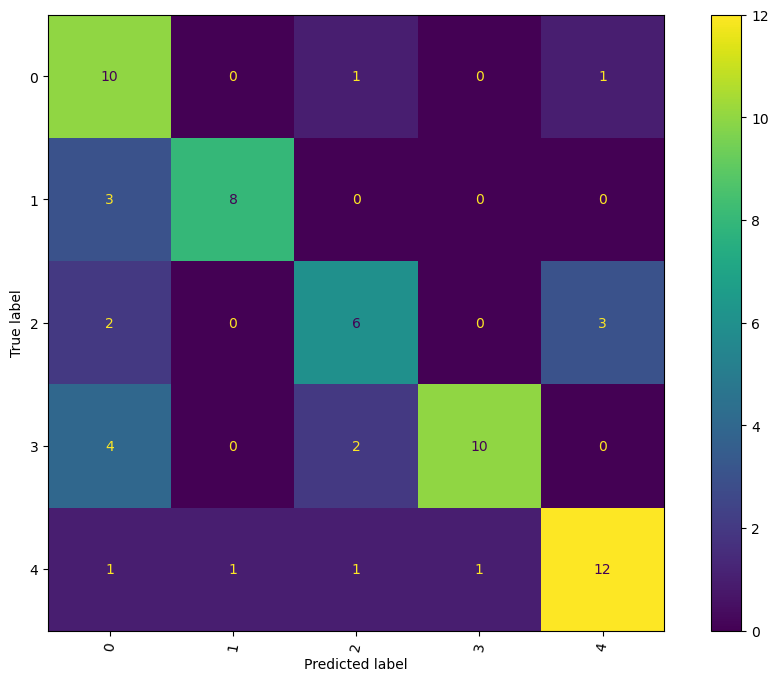

In [288]:
# fit model
knn.fit(X_train,y_train)
# display classification report
metric6=[]
display_classification_report(knn,metric6)

## Hyperparameter tuning using GridSearchCV

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   27.9s finished


Best Score:  0.6
Best Hyperparameters:  {'alpha': 0.01}
(66, 5) (66,)
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.93
Train Accuracy : 1.0
Test Accuracy : 0.76
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        44
           4       1.00      1.00      1.00        41

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.85      1.00      0.92        11
           2       0.50      0.45      0.48        11
           3       0.85      0.69      0.76        16
           

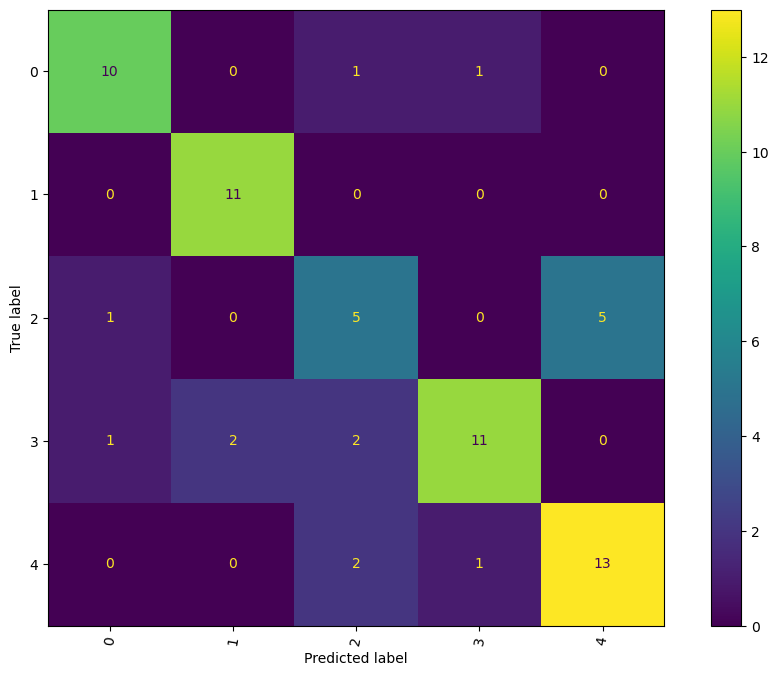

In [289]:
## multinomial Naive Bayes with Grid Search CV ##
# Multinomial Naive Bayes with GridSearchCV

mnb = MultinomialNB()

mnb_params = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001)  
}

# create gridsearch object
grid_search_mnb = grid_search(mnb, folds, mnb_params, scoring=None)

# fit model
grid_search_mnb.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_mnb)

# Random Forest Classification Report
metric7=[]
display_classification_report(grid_search_mnb,metric7)

## Logistic Regression with GridSearchCV

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.6s finished


Best Score:  0.8153846153846154
Best Hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
(66, 5) (66,)
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.97
Train Accuracy : 1.0
Test Accuracy : 0.8
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        44
           4       1.00      1.00      1.00        41

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

Classification Report for Test:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.69      1.00      0.81        11
           2       0.88      0.64      0.74        11
           3       0.8

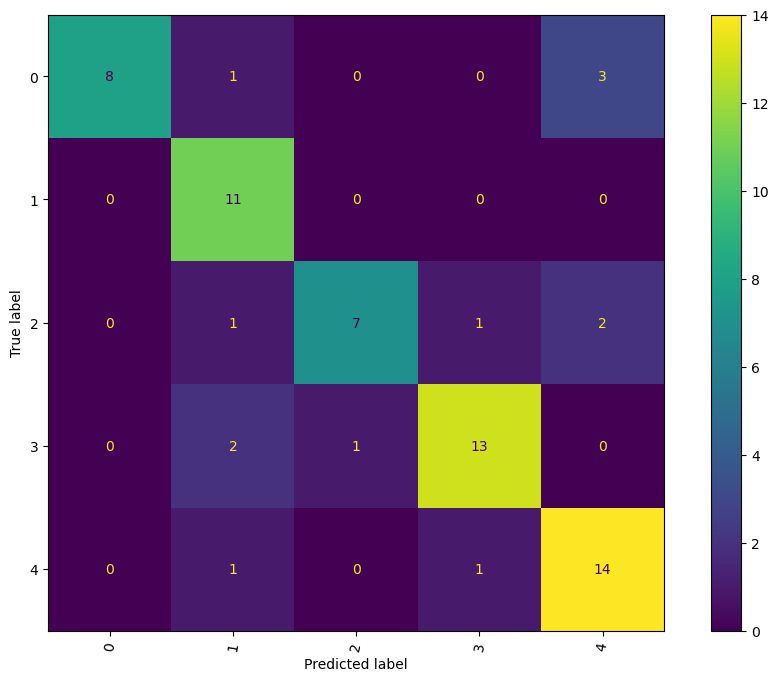

In [290]:
# logistic regression
log_reg = LogisticRegression()

# hyperparameter for Logistic Regression
log_params = {'C': [0.01, 1, 10], 
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear','newton-cg','saga']
         }

# create gridsearch object
grid_search_log = grid_search(log_reg, folds, log_params, scoring=None)

# fit model
grid_search_log.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_log)

# Random Forest Classification Report
metric8=[]
display_classification_report(grid_search_log,metric8)

## Decision Tree Classification wuth GridSearchCV ##

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.0s finished


Best Score:  0.6410256410256411
Best Hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 20}
(66, 5) (66,)
ROC AUC Score Train: 0.87
ROC AUC Score Test: 0.78
Train Accuracy : 0.65
Test Accuracy : 0.62
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.52      0.52      0.52        29
           1       0.78      0.80      0.79        56
           2       0.00      0.00      0.00        25
           3       0.61      0.80      0.69        44
           4       0.63      0.78      0.70        41

    accuracy                           0.65       195
   macro avg       0.51      0.58      0.54       195
weighted avg       0.57      0.65      0.61       195

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.50      0.82      0.62        11
           2       0.00      0.00      0.00        11
           3       0.71

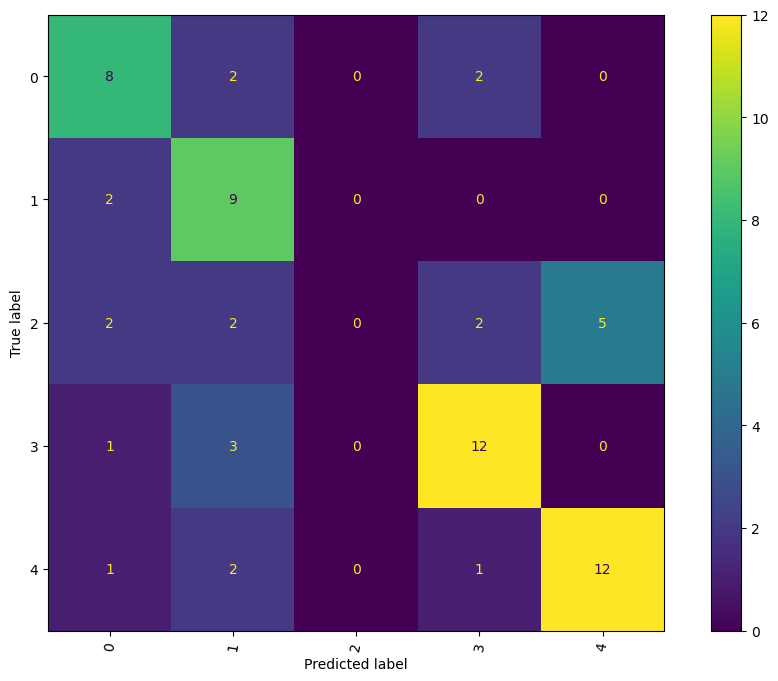

In [291]:
# Decision Tree Classification wuth GridSearchCV

dtc = DecisionTreeClassifier()

dtc_params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20,30]
}

# create gridsearch object
grid_search_dtc = grid_search(dtc,folds, dtc_params, scoring=None)

# fit model
grid_search_dtc.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_dtc)

# Random Forest Classification Report
metric9=[]
display_classification_report(grid_search_dtc,metric9)

## Random Forest Classifier with GridSearchCV ##

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.1min finished


OOB SCORE : 0.5743589743589743
Best Score:  0.5641025641025641
Best Hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 200}
(66, 5) (66,)
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.93
Train Accuracy : 0.91
Test Accuracy : 0.56
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      0.72      0.84        29
           1       0.78      1.00      0.88        56
           2       1.00      0.76      0.86        25
           3       0.98      1.00      0.99        44
           4       1.00      0.93      0.96        41

    accuracy                           0.91       195
   macro avg       0.95      0.88      0.91       195
weighted avg       0.93      0.91      0.91       195

Classification Report for Test:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.33      1.00      0.50        11
           2       0.50   

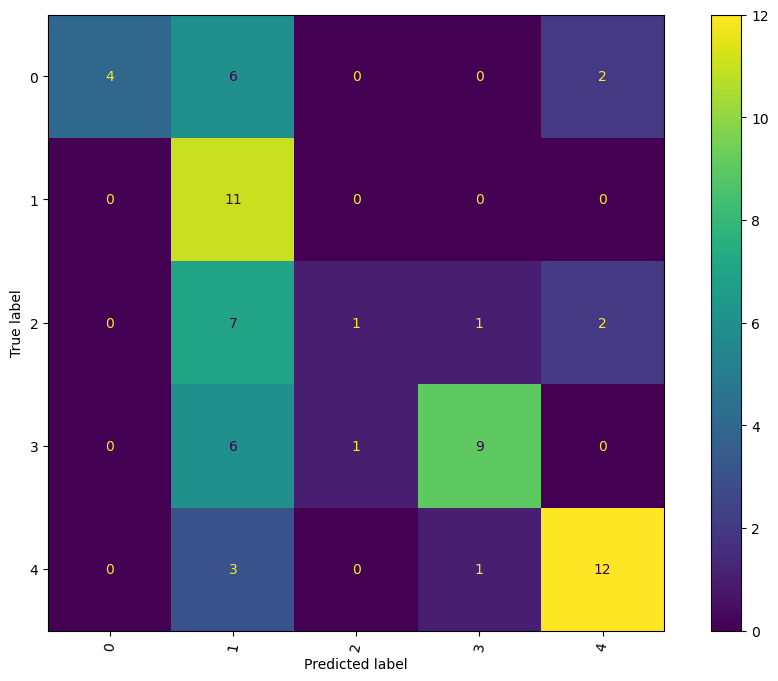

In [292]:
# Random Forest Classifier with GridSearchCV

rfc = RandomForestClassifier(random_state=40, n_jobs = -1,oob_score=True)

# hyperparameters for Random Forest
rfc_params = {'max_depth': [10,20,30,40],
          'min_samples_leaf': [5,10,15,20,30],
          'n_estimators': [100,200,500,700]
        }

# create gridsearch object
grid_search_rfc = grid_search(rfc, folds, rfc_params, scoring=None)

# fit model
grid_search_rfc.fit(X_train, y_train)

# oob score
print('OOB SCORE :',grid_search_rfc.best_estimator_.oob_score_)

# print best hyperparameters
print_best_score_params(grid_search_rfc)

# Random Forest Classification Report
metric10=[]
display_classification_report(grid_search_rfc,metric10)

## XGB Classifier with grid search CV ##

In [ ]:
xgb = XGBClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}
# create gridsearch object
grid_search_xgb = grid_search(xgb, folds, param_grid, scoring=None)

# fit model
grid_search_xgb.fit(X_train, y_train)



# print best hyperparameters
print_best_score_params(grid_search_xgb)

# Random Forest Classification Report
metric11=[]
display_classification_report(grid_search_xgb,metric11)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 69.2min


## Consolidated View ##

In [606]:
table = {'Metric': ['ROC_AUC Score(Train)','ROC_AUC Score(Test)',
                    'Accuracy(Train)','Accuracy(Test)',
                    'Precision(Train)','Precision(Test)',
                    'Recall(Train)','Recall(Test)',
                    'F1-Score(Train)','F1-Score(Test)'
                   ], 
        'Multinomial Naive Bayes': metric1
        }

mnb_metric = pd.DataFrame(table ,columns = ['Metric', 'Multinomial Naive Bayes'] )
log_metric = pd.Series(metric2, name = 'Logistic Regression')
dtc_metric = pd.Series(metric3, name = 'Decision Tree Classifier')
rfc_metric = pd.Series(metric4, name = 'Random Forest Classifier')
xgb_metric = pd.Series(metric5, name = 'XGBOOST Classifier')
knn_metric = pd.Series(metric6, name = 'KNN Classifier')
grid_mnb_metric = pd.Series(metric7, name = 'Multinomial Naive Bayes with GridSearchCV')
grid_log_metric = pd.Series(metric8, name = 'Logistic Regression with GridSearchCV')
grid_dtc_metric = pd.Series(metric9, name = 'Decision Tree Classifier with GridSearchCV')
grid_rfc_metric = pd.Series(metric10, name = 'Random Forest Classifier with GridSearchCV')
grid_xgb_metric = pd.Series(metric11, name = 'XGB Classifier with GridSearchCV')
final_metric = pd.concat([mnb_metric,log_metric,dtc_metric,rfc_metric,xgb_metric,knn_metric,
                         grid_mnb_metric,grid_log_metric,grid_dtc_metric,grid_rfc_metric,grid_xgb_metric], axis = 1)


In [607]:
final_metric

,Metric,Multinomial Naive Bayes,Logistic Regression,Decision Tree Classifier,Random Forest Classifier,XGBOOST Classifier,KNN Classifier,Multinomial Naive Bayes with GridSearchCV,Logistic Regression with GridSearchCV,Decision Tree Classifier with GridSearchCV,Random Forest Classifier with GridSearchCV,XGB Classifier with GridSearchCV
0,ROC_AUC Score(Train),1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.92,1.00,1.00
1,ROC_AUC Score(Test),0.92,0.94,0.60,0.80,0.92,0.92,0.92,0.92,0.84,0.80,0.71
2,Accuracy(Train),0.38,0.71,1.00,1.00,0.38,1.00,0.38,1.00,0.74,0.56,0.94
3,Accuracy(Test),0.29,0.29,0.43,0.29,0.29,0.86,0.29,0.86,0.53,0.29,0.14
4,Precision(Train),0.15,0.60,1.00,1.00,0.15,1.00,0.15,1.00,0.80,0.59,0.90
5,Precision(Test),0.08,0.08,0.36,0.08,0.08,0.76,0.08,0.76,0.44,0.11,0.29
6,Recall(Train),0.38,0.71,1.00,1.00,0.38,1.00,0.38,1.00,0.74,0.56,0.94
7,Recall(Test),0.29,0.29,0.43,0.29,0.29,0.86,0.29,0.86,0.53,0.29,0.14
8,F1-Score(Train),0.21,0.63,1.00,1.00,0.21,1.00,0.21,1.00,0.73,0.50,0.92
9,F1-Score(Test),0.13,0.13,0.38,0.13,0.13,0.80,0.13,0.80,0.48,0.16,0.19


## Complaint Prediction ##

In [723]:
# raw complaint text
test_complaint= 'I tried to make a transaction at a supermarket retail store, using my chase \
debit/atm card, but the transaction was declined. I am still able to withdraw money out of an \
ATM machine using the same debit card. Please resolve this issue.'

In [724]:
from sklearn import *

In [725]:
# vectorize and tf-idf tranform
test = count_vect.transform([test_complaint])
test_tfidf = tfidf_transformer.transform(test)

In [726]:
test.shape

(1, 1052)

In [727]:
test_tfidf.shape

(1, 1052)

In [728]:
# predict
prediction=grid_search_log.predict(test_tfidf)
prediction

array([0], dtype=int64)

In [729]:
topic_mapping[prediction[0]]

'Bank Account services'